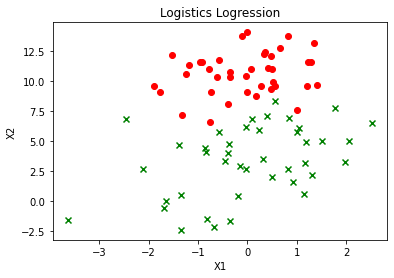

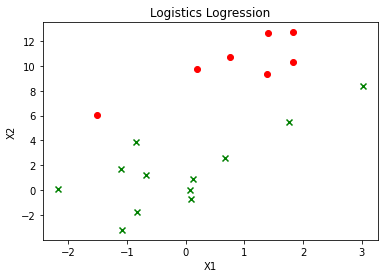

(2, 19)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

#plot 
# data的数据格式{x1,x2,y} x1 x2为点坐标y为其标签
# 决策边界 w 与 b 画一个线来分类两个点
def plot_with_line(data,w,b):
    
    x_1_list = [] #存放所有标签为1的数据
    x_0_list = [] #存放所有标签为0的数据
    
    fig = plt.figure()  
    ax1 = fig.add_subplot(111)  
    #设置标题  
    ax1.set_title('Logistics Logression')  
    #设置X轴标签  
    plt.xlabel('X1')  
    #设置Y轴标签  
    plt.ylabel('X2')  
    
    for index in range(np.shape(data)[0]): 
        if(data[index,3] == 1):
            x_1_list.append([data[index,0],data[index,1]])
        else:
            x_0_list.append([data[index,0],data[index,1]])
            
    x_0 = np.array(x_0_list)        
    x_1 = np.array(x_1_list)
    
    #画对应的散点图与决策边界
    ax1.scatter(x_0[...,0],x_0[...,1],c = 'r',marker = 'o')  
    ax1.scatter(x_1[...,0],x_1[...,1],c = 'g',marker = 'x')  
    
    #确定边界函数的定义域，所有点的最小值与最大值作为画图的x范围
    if(min(x_0[...,0]) > min(x_1[...,0])):
       l = min(x_1[...,0]) 
    else:
       l = min(x_0[...,0]) 

    if(max(x_0[...,0]) > max(x_1[...,0])):
       h = max(x_0[...,0]) 
    else:
       h = max(x_1[...,0])
    
    w_x = np.linspace(l,h,100)
    w_y = w * w_x + b
    
    ax1.plot(w_x,w_y)
    
    #显示所画的图  
    plt.show() 
     
def plot(data):
    
    x_1_list = [] #存放所有标签为1的数据
    x_0_list = [] #存放所有标签为0的数据
    
    fig = plt.figure()  
    ax1 = fig.add_subplot(111)  
    #设置标题  
    ax1.set_title('Logistics Logression')  
    #设置X轴标签  
    plt.xlabel('X1')  
    #设置Y轴标签  
    plt.ylabel('X2')  
    
    for index in range(np.shape(data)[0]): 
        if(data[index,3] == 1):
            x_1_list.append([data[index,0],data[index,1]])
        else:
            x_0_list.append([data[index,0],data[index,1]])
            
    x_0 = np.array(x_0_list)        
    x_1 = np.array(x_1_list)
    
    #画对应的散点图与决策边界
    ax1.scatter(x_0[...,0],x_0[...,1],c = 'r',marker = 'o')  
    ax1.scatter(x_1[...,0],x_1[...,1],c = 'g',marker = 'x')  
    
    #显示所画的图  
    plt.show()  
    
def loadData(data_url):
    train_x = []
    train_y = []
    data_all =[]

    file = open(data_url)
    for line in file.readlines():
        lineArr=line.strip().split()
        train_x.append([float(lineArr[0]),float(lineArr[1]),1])
        train_y.append(float(lineArr[2]))
        
        data_all.append([float(lineArr[0]),float(lineArr[1]),1,float(lineArr[2])])
        
    train_x_array = np.array(train_x)
    train_y_array = np.array(train_y)
    data_all_array = np.array(data_all)
                         
    return train_x_array,train_y_array,data_all_array

#输入全体数据 x =(x1,x2) y={0,1} 随机取80%作为训练集 20%作为测试集合
def prepare_train_and_test_data():
    (xdata,ydata,allData)=loadData('../../data/data.d')
    #获取行数的顺序编号
    trainIndex = np.arange(allData.shape[0])
    #随机打乱行号编号
    #np.random.shuffle(trainIndex)
    #获得其中随机取到的行数据
    tran_data = allData[trainIndex[0:80]]
    test_data = allData[trainIndex[80:99]]
    
    return tran_data,test_data

(train,test) = prepare_train_and_test_data()

plot(train)
plot(test)

train_data = train[:,:2].transpose()
train_label = train[:,3].reshape(1,80)

test_data = test[:,:2].transpose()
test_label = test[:,3].transpose()
print(np.shape(test_data))


根据深度神经网络的知识重新解决此问题

构建一个包含两个神经元隐藏层的网络

输入矩阵的大小是 (2,80) 2 是因为输入特征的维度是2,80代表的是数据的数量
$w^1$的矩阵大小是(2,2)，因为我们构建的网络隐藏层是2个神经元，(输出神经元数量，输入数据维度)，做出如上规律整理
$w^2$的矩阵大小是(1,2),因为输出是1个神经元输入是2个

正向传播的过程

$$z^1 = w^1x+b^1 $$(2,2)*(2,80)=(2,80)
$$a^1 = \sigma(z^l) $$(2,80)
$$z^2 = w^2a^1+b^2 $$(1,2)*(2,80)=(1,80)
$$\hat{y}=a^2=\sigma(z^2) $$(1,80)

反向传播的过程

$${\delta}^2 = label - \hat{y}$$
$${\delta}^1 = ((w^2)^T * {\delta}^2) \bigodot \sigma'(z1)$$
$$\frac{\partial{C}}{\partial{b^2_1}} = {\delta}^2_1$$
$$\frac{\partial{C}}{\partial{b^1_1}} = {\delta}^1_1$$
$$\frac{\partial{C}}{\partial{b^1_2}} = {\delta}^1_2$$

$$\frac{\partial{C}}{\partial{w^2_{11}}} = a^1_1{\delta}^2_1$$
$$\frac{\partial{C}}{\partial{w^2_{12}}} = a^1_2{\delta}^2_1$$

$$\frac{\partial{C}}{\partial{w^1_{11}}} = a^0_1{\delta}^2_1$$
$$\frac{\partial{C}}{\partial{w^1_{12}}} = a^0_2{\delta}^2_1$$
$$\frac{\partial{C}}{\partial{w^1_{21}}} = a^0_1{\delta}^2_2$$
$$\frac{\partial{C}}{\partial{w^1_{22}}} = a^0_2{\delta}^2_2$$

In [289]:
import scipy.special

activation_function = lambda x: scipy.special.expit(x)


def forword_back(w1,w2,b1,b2,nn):
    
    b1_repeat = b1.repeat(nn,axis=1)
    b2_repeat = b2.repeat(nn,axis=1)
    
    z1 = np.dot(w1,train_data) + b1_repeat
    a1 = activation_function(z1)

    z2 = np.dot(w2,a1) + b2_repeat
    a2 = activation_function(z2)
    
    delta_2 = a2 - train_label
    delta_1 = np.multiply(np.multiply(np.dot(w2.transpose(),delta_2),a1),1-a1)
    
    db2 = delta_2
    db1 = delta_1
    
    dw1 = np.multiply(train_data,delta_1)
    dw2 = np.multiply(a1,delta_2)
    
    loss = np.multiply(delta_2,delta_2)
    
    return loss.sum(),db1.sum(axis=1),db2.sum(axis=1),dw1.sum(axis=1),dw2.sum(axis=1)

def train(hidden_n,lamada ,n):
    w1 = np.random.normal(0.0, pow(2, -0.5), (hidden_n,2))
    w2 = np.random.normal(0.0, pow(2, -0.5), (1,hidden_n))
    b1 = np.zeros([hidden_n,1])
    b2 = np.zeros([1,1])
    
    for i in range(n):
        loss,db1,db2,dw1,dw2 = forword_back(w1,w2,b1,b2,80)

       # print(np.shape(db2))
        w1 = w1 - dw1 * lamada
        w2 = w2 - dw2 * lamada
        
        b1 = b1 - db1.reshape(hidden_n,1) * lamada
        b2 = b2 - db2.reshape(1,1) * lamada

        print(loss)
        
    return w1,w2,b1,b2
W1,W2,B1,B2 = train(2,0.0001,100000)



19.363154673962924
19.350763042218972
19.338446276749327
19.326203964864952
19.314035695303872
19.301941058242186
19.289919645304632
19.27797104957488
19.26609486560544
19.254290689427258
19.24255811855895
19.230896752015763
19.21930619031814
19.20778603550002
19.19633589111684
19.184955362253138
19.173644055529973
19.16240157911195
19.151227542713993
19.14012155760785
19.12908323662822
19.118112194178735
19.10720804623755
19.09637041036271
19.08559890569724
19.074893152973978
19.064252774520142
19.05367739426166
19.043166637727175
19.03272013205194
19.02233750598132
19.012018389874157
19.00176241570587
18.991569217071294
18.981438429187357
18.971369688895457
18.961362634663697
18.95141690658883
18.941532146398046
18.93170799745053
18.921944104738827
18.912240114889975
18.90259567616649
18.893010438467112
18.88348405332739
18.87401617392006
18.864606455055274
18.855254553180597
18.845960126380874
18.836722834377895
18.82754233852993
18.818418301831038
18.809350388910254
18.800338266030

17.233048706461446
17.232358522693417
17.231668189604513
17.23097770126918
17.23028705177878
17.22959623524159
17.228905245782713
17.228214077544045
17.227522724684277
17.2268311813788
17.22613944181971
17.225447500215786
17.224755350792442
17.224062987791715
17.223370405472274
17.222677598109357
17.221984559994805
17.22129128543704
17.220597768761067
17.21990400430846
17.21920998643739
17.218515709522606
17.217821167955478
17.217126356143964
17.216431268512686
17.215735899502903
17.21504024357256
17.214344295196298
17.213648048865508
17.212951499088334
17.21225464038973
17.2115574673115
17.21085997441232
17.210162156267803
17.209464007470537
17.208765522630138
17.208066696373315
17.20736752334389
17.206667998202906
17.205968115628647
17.20526787031673
17.204567256980155
17.20386627034938
17.20316490517239
17.202463156214783
17.201761018259837
17.201058486108572
17.20035555457988
17.19965221851054
17.198948472755376
17.1982443121873
17.197539731697404
17.196834726195068
17.196129290608

16.705439455714714
16.704352697754487
16.703265538319222
16.70217797841859
16.701090019057254
16.700001661234857
16.69891290594605
16.697823754180536
16.696734206923075
16.69564426515351
16.694553929846805
16.693463201973035
16.692372082497457
16.6912805723805
16.690188672577793
16.6890963840402
16.688003707713847
16.686910644540134
16.685817195455755
16.684723361392734
16.68362914327846
16.682534542035683
16.68143955858256
16.680344193832674
16.679248448695045
16.678152324074187
16.677055820870095
16.675958939978294
16.67486168228985
16.673764048691414
16.672666040065216
16.67156765728912
16.67046890123663
16.669369772776918
16.668270272774855
16.667170402091028
16.666070161581764
16.66496955209917
16.663868574491126
16.66276722960135
16.66166551826938
16.660563441330638
16.65946099961643
16.658358193953973
16.657255025166428
16.656151494072912
16.655047601488544
16.653943348224438
16.652838735087766
16.65173376288173
16.650628432405647
16.649522744454927
16.648416699821112
16.6473102

16.004262387004047
16.003033882419455
16.00180526241234
16.000576527365933
15.999347677663431
15.998118713687967
15.996889635822628
15.995660444450445
15.994431139954393
15.99320172271739
15.991972193122292
15.9907425515519
15.989512798388944
15.988282934016102
15.987052958815976
15.985822873171115
15.984592677463977
15.983362372076973
15.982131957392431
15.980901433792607
15.979670801659683
15.978440061375771
15.977209213322894
15.975978257883003
15.97474719543797
15.973516026369577
15.972284751059526
15.971053369889436
15.969821883240833
15.968590291495161
15.967358595033769
15.966126794237908
15.964894889488756
15.96366288116737
15.962430769654727
15.961198555331698
15.959966238579065
15.958733819777489
15.957501299307546
15.956268677549698
15.955035954884302
15.953803131691608
15.952570208351755
15.951337185244775
15.950104062750576
15.948870841248965
15.947637521119624
15.946404102742118
15.9451705864959
15.943936972760293
15.942703261914495
15.941469454337597
15.940235550408538
1

15.223056733945313
15.221820308658831
15.22058394697778
15.219347649048487
15.218111415016866
15.216875245028413
15.215639139228216
15.214403097760947
15.213167120770873
15.211931208401845
15.21069536079731
15.209459578100297
15.208223860453437
15.206988207998949
15.205752620878641
15.204517099233922
15.203281643205788
15.202046252934835
15.200810928561255
15.199575670224833
15.19834047806495
15.197105352220586
15.195870292830321
15.194635300032333
15.193400373964401
15.192165514763898
15.190930722567806
15.189695997512697
15.188461339734763
15.187226749369783
15.185992226553143
15.18475777141984
15.183523384104465
15.182289064741223
15.181054813463927
15.179820630405988
15.178586515700427
15.177352469479878
15.176118491876583
15.174884583022385
15.17365074304875
15.172416972086744
15.171183270267052
15.169949637719967
15.168716074575396
15.167482580962862
15.166249157011496
15.165015802850048
15.163782518606887
15.162549304409996
15.161316160386967
15.160083086665024
15.15885008337099

14.510291486812019
14.5091070000069
14.507922612943133
14.506738325627417
14.505554138066334
14.504370050266356
14.503186062233848
14.502002173975054
14.500818385496117
14.499634696803064
14.498451107901808
14.497267618798162
14.49608422949781
14.49490094000635
14.49371775032925
14.492534660471877
14.491351670439489
14.490168780237235
14.488985989870148
14.487803299343163
14.486620708661098
14.485438217828667
14.484255826850472
14.483073535731013
14.481891344474676
14.480709253085747
14.479527261568396
14.47834536992669
14.477163578164589
14.475981886285952
14.47480029429452
14.473618802193936
14.472437409987734
14.471256117679346
14.470074925272092
14.468893832769194
14.467712840173764
14.466531947488807
14.46535115471723
14.46417046186183
14.462989868925302
14.461809375910235
14.460628982819117
14.45944868965433
14.458268496418153
14.457088403112762
14.455908409740228
14.454728516302524
14.45354872280151
14.45236902923896
14.45118943561653
14.45000994193578
14.448830548198169
14.4476

13.700579199078408
13.699461684052395
13.69834425413958
13.6972269092997
13.696109649492454
13.694992474677498
13.69387538481446
13.69275837986292
13.691641459782424
13.690524624532486
13.689407874072572
13.68829120836212
13.687174627360525
13.686058131027146
13.684941719321309
13.683825392202294
13.682709149629353
13.681592991561697
13.680476917958497
13.679360928778895
13.678245023981985
13.677129203526837
13.67601346737247
13.674897815477884
13.673782247802027
13.672666764303818
13.671551364942133
13.670436049675823
13.66932081846369
13.66820567126451
13.667090608037018
13.66597562873991
13.664860733331853
13.663745921771472
13.662631194017358
13.66151655002807
13.660401989762121
13.659287513178
13.658173120234158
13.657058810889001
13.65594458510091
13.654830442828224
13.653716384029252
13.652602408662261
13.65148851668549
13.650374708057136
13.649260982735367
13.648147340678312
13.647033781844065
13.645920306190687
13.644806913676199
13.643693604258598
13.642580377895833
13.641467

12.959028986426775
12.957958581519163
12.956888228924054
12.955817928589742
12.954747680464518
12.953677484496687
12.952607340634547
12.951537248826401
12.950467209020562
12.949397221165334
12.948327285209043
12.9472574011
12.946187568786524
12.945117788216951
12.944048059339604
12.942978382102815
12.941908756454925
12.940839182344272
12.9397696597192
12.938700188528063
12.93763076871921
12.936561400240993
12.935492083041783
12.93442281706994
12.93335360227383
12.93228443860183
12.931215326002317
12.930146264423676
12.929077253814288
12.928008294122545
12.92693938529685
12.925870527285596
12.924801720037188
12.923732963500042
12.922664257622563
12.921595602353175
12.920526997640303
12.919458443432376
12.918389939677825
12.91732148632509
12.916253083322614
12.91518473061885
12.914116428162249
12.913048175901272
12.91197997378438
12.910911821760047
12.909843719776745
12.908775667782962
12.907707665727177
12.906639713557885
12.905571811223583
12.904503958672777
12.903436155853969
12.90236

12.326479640527756
12.32543166536838
12.324383713907192
12.323335786102813
12.322287881913885
12.321240001299095
12.320192144217152
12.319144310626788
12.31809650048677
12.317048713755895
12.316000950392988
12.314953210356903
12.313905493606521
12.312857800100756
12.31181012979855
12.310762482658875
12.30971485864073
12.308667257703142
12.307619679805176
12.30657212490592
12.305524592964487
12.304477083940029
12.303429597791723
12.302382134478774
12.30133469396042
12.300287276195931
12.299239881144596
12.29819250876574
12.297145159018728
12.296097831862932
12.295050527257777
12.2940032451627
12.292955985537183
12.291908748340726
12.290861533532862
12.289814341073157
12.288767170921204
12.287720023036627
12.28667289737908
12.285625793908249
12.284578712583844
12.283531653365614
12.282484616213331
12.281437601086797
12.280390607945849
12.279343636750353
12.2782966874602
12.277249760035318
12.276202854435663
12.27515597062122
12.274109108552006
12.273062268188067
12.272015449489476
12.270

11.63616825562236
11.635128490892878
11.634088729811877
11.633048972361015
11.63200921852199
11.630969468276522
11.629929721606384
11.628889978493378
11.62785023891934
11.626810502866146
11.62577077031571
11.624731041249973
11.623691315650927
11.622651593500585
11.621611874781008
11.620572159474289
11.619532447562555
11.618492739027975
11.617453033852744
11.61641333201911
11.61537363350934
11.614333938305744
11.613294246390677
11.612254557746514
11.611214872355678
11.610175190200623
11.60913551126384
11.608095835527863
11.607056162975251
11.606016493588601
11.60497682735056
11.603937164243792
11.602897504251011
11.601857847354957
11.600818193538418
11.599778542784204
11.598738895075174
11.597699250394218
11.596659608724257
11.595619970048256
11.594580334349214
11.593540701610163
11.592501071814176
11.591461444944356
11.590421820983847
11.589382199915825
11.58834258172351
11.587302966390144
11.586263353899021
11.585223744233463
11.584184137376823
11.583144533312499
11.58210493202392
11.

11.08110805369328
11.080068504623934
11.079028954256398
11.07798940258968
11.076949849622842
11.075910295354948
11.074870739785105
11.073831182912441
11.072791624736114
11.071752065255307
11.070712504469231
11.069672942377126
11.068633378978255
11.067593814271916
11.066554248257425
11.065514680934129
11.064475112301405
11.06343554235865
11.062395971105296
11.061356398540795
11.060316824664636
11.059277249476324
11.058237672975393
11.05719809516141
11.056158516033967
11.05511893559268
11.054079353837189
11.05303977076717
11.052000186382315
11.050960600682359
11.049921013667046
11.048881425336155
11.047841835689493
11.04680224472689
11.045762652448206
11.044723058853325
11.043683463942163
11.042643867714652
11.041604270170762
11.040564671310484
11.039525071133841
11.038485469640868
11.037445866831646
11.036406262706269
11.035366657264863
11.03432705050758
11.033287442434597
11.032247833046117
11.031208222342372
11.03016861032362
11.029128996990144
11.028089382342252
11.027049766380284
11

10.296140261853342
10.295101181296488
10.294062105405896
10.293023034197876
10.291983967688761
10.290944905894904
10.289905848832689
10.288866796518516
10.287827748968818
10.28678870620005
10.285749668228682
10.284710635071223
10.283671606744196
10.282632583264157
10.281593564647677
10.280554550911358
10.279515542071824
10.278476538145728
10.277437539149739
10.276398545100559
10.275359556014909
10.274320571909538
10.27328159280122
10.272242618706752
10.271203649642954
10.270164685626675
10.269125726674785
10.268086772804185
10.267047824031792
10.266008880374553
10.264969941849444
10.263931008473453
10.262892080263606
10.26185315723695
10.260814239410553
10.259775326801513
10.258736419426954
10.25769751730402
10.25665862044988
10.255619728881733
10.254580842616804
10.253541961672335
10.2525030860656
10.251464215813897
10.250425350934549
10.249386491444902
10.248347637362333
10.247308788704236
10.246269945488041
10.245231107731193
10.24419227545117
10.24315344866547
10.242114627391619
10

9.593806888201193
9.59277625569683
9.591745646265005
9.590715059946826
9.589684496783438
9.588653956816046
9.587623440085903
9.586592946634308
9.585562476502616
9.584532029732227
9.583501606364592
9.58247120644121
9.58144083000364
9.58041047709348
9.579380147752383
9.57834984202205
9.577319559944236
9.576289301560742
9.575259066913425
9.574228856044185
9.573198668994973
9.572168505807802
9.571138366524721
9.570108251187838
9.569078159839304
9.56804809252133
9.56701804927617
9.565988030146134
9.564958035173575
9.563928064400907
9.562898117870581
9.561868195625117
9.560838297707065
9.55980842415904
9.558778575023709
9.557748750343773
9.556718950162004
9.555689174521216
9.554659423464269
9.55362969703408
9.552599995273615
9.551570318225892
9.55054066593398
9.549511038440995
9.548481435790112
9.547451858024548
9.546422305187573
9.545392777322515
9.544363274472746
9.543333796681694
9.542304343992829
9.54127491644968
9.54024551409583
9.539216136974906
9.538186785130584
9.537157458606604
9.53

9.02368912287494
9.022679233666768
9.021669398383832
9.020659617094477
9.01964988986709
9.018640216770082
9.017630597871914
9.016621033241073
9.015611522946084
9.01460206705551
9.013592665637951
9.01258331876204
9.011574026496445
9.010564788909877
9.00955560607107
9.008546478048803
9.007537404911888
9.006528386729169
9.005519423569531
9.00451051550189
9.003501662595196
9.00249286491844
9.001484122540639
9.000475435530849
8.99946680395816
8.998458227891703
8.99744970740063
8.996441242554141
8.995432833421457
8.994424480071848
8.993416182574606
8.992407940999058
8.991399755414571
8.990391625890542
8.9893835524964
8.988375535301614
8.987367574375678
8.986359669788124
8.985351821608518
8.984344029906456
8.98333629475157
8.982328616213518
8.981320994362004
8.980313429266754
8.979305920997533
8.978298469624129
8.977291075216373
8.976283737844124
8.97527645757727
8.974269234485739
8.973262068639482
8.97225496010849
8.97124790896278
8.970240915272406
8.96923397910745
8.968227100538023
8.967220

8.343606676508012
8.342651147636865
8.341695721996375
8.34074039965044
8.339785180662885
8.338830065097504
8.337875053018035
8.33692014448815
8.335965339571482
8.335010638331603
8.334056040832035
8.333101547136248
8.332147157307656
8.33119287140962
8.330238689505451
8.329284611658402
8.328330637931668
8.327376768388408
8.326423003091705
8.3254693421046
8.324515785490082
8.323562333311077
8.32260898563046
8.321655742511055
8.320702604015631
8.319749570206895
8.318796641147507
8.31784381690007
8.316891097527126
8.315938483091175
8.31498597365465
8.314033569279928
8.313081270029343
8.31212907596516
8.311176987149596
8.31022500364481
8.309273125512902
8.308321352815922
8.307369685615857
8.306418123974648
8.305466667954168
8.304515317616238
8.30356407302263
8.302612934235047
8.30166190131514
8.300710974324506
8.299760153324687
8.298809438377159
8.297858829543348
8.296908326884619
8.295957930462286
8.295007640337595
8.294057456571743
8.293107379225866
8.292157408361042
8.291207544038297
8.29

7.7643158474468965
7.763435312854032
7.7625549083524525
7.7616746339614595
7.760794489700279
7.759914475588062
7.75903459164389
7.758154837886778
7.757275214335661
7.756395721009407
7.755516357926812
7.754637125106599
7.753758022567419
7.752879050327856
7.752000208406416
7.75112149682154
7.75024291559159
7.749364464734866
7.74848614426959
7.747607954213913
7.746729894585918
7.745851965403617
7.744974166684948
7.744096498447776
7.743218960709903
7.7423415534890525
7.741464276802882
7.740587130668974
7.739710115104845
7.738833230127936
7.73795647575562
7.737079852005199
7.7362033588939045
7.735326996438895
7.734450764657263
7.733574663566028
7.7326986931821375
7.731822853522471
7.730947144603839
7.730071566442978
7.729196119056557
7.728320802461175
7.727445616673355
7.726570561709561
7.725695637586179
7.7248208443195265
7.723946181925852
7.723071650421332
7.722197249822077
7.721322980144126
7.720448841403445
7.719574833615937
7.718700956797429
7.717827210963684
7.7169535961303914
7.71608

7.2493095655085495
7.248509995331984
7.247710555941562
7.246911247324599
7.246112069468387
7.245313022360181
7.244514105987214
7.243715320336687
7.242916665395766
7.24211814115159
7.241319747591272
7.240521484701889
7.23972335247049
7.238925350884095
7.238127479929698
7.237329739594259
7.236532129864706
7.235734650727945
7.234937302170847
7.2341400841802574
7.23334299674299
7.232546039845829
7.231749213475531
7.2309525176188245
7.230155952262406
7.229359517392945
7.228563212997083
7.227767039061433
7.226970995572577
7.226175082517068
7.2253792998814355
7.2245836476521745
7.223788125815755
7.222992734358618
7.222197473267176
7.221402342527813
7.220607342126886
7.219812472050722
7.219017732285623
7.218223122817861
7.217428643633678
7.2166342947192925
7.215840076060893
7.21504598764464
7.214252029456667
7.21345820148308
7.212664503709959
7.211870936123354
7.211077498709288
7.2102841914537565
7.209491014342731
7.208697967362153
7.207905050497937
7.20711226373597
7.206319607062115
7.2055270

6.79394127506148
6.7932168932437005
6.792492631270567
6.79176848912096
6.791044466773762
6.790320564207854
6.789596781402114
6.7888731183354185
6.788149574986641
6.787426151334657
6.786702847358331
6.785979663036537
6.785256598348139
6.784533653272002
6.783810827786992
6.783088121871967
6.782365535505788
6.781643068667313
6.780920721335397
6.780198493488896
6.779476385106664
6.77875439616755
6.778032526650403
6.777310776534075
6.776589145797409
6.775867634419253
6.775146242378451
6.77442496965384
6.773703816224266
6.772982782068567
6.772261867165579
6.771541071494143
6.770820395033091
6.770099837761258
6.769379399657476
6.768659080700576
6.767938880869391
6.767218800142748
6.766498838499475
6.765778995918399
6.7650592723783465
6.76433966785814
6.763620182336606
6.7629008157925625
6.762181568204836
6.761462439552244
6.760743429813605
6.760024538967741
6.759305766993467
6.758587113869599
6.757868579574954
6.757150164088346
6.75643186738859
6.7557136894545
6.754995630264886
6.754277689798

6.312418921203392
6.311773767515384
6.311128719362623
6.310483776726521
6.3098389395885
6.3091942079299885
6.308549581732419
6.307905060977232
6.307260645645872
6.306616335719795
6.305972131180459
6.30532803200933
6.304684038187877
6.30404014969758
6.303396366519926
6.302752688636404
6.302109116028509
6.301465648677749
6.300822286565632
6.300179029673675
6.2995358779833985
6.298892831476335
6.29824989013402
6.297607053937995
6.296964322869807
6.296321696911013
6.295679176043172
6.295036760247854
6.294394449506631
6.293752243801084
6.293110143112801
6.292468147423374
6.291826256714403
6.291184470967493
6.290542790164257
6.289901214286315
6.2892597433152915
6.288618377232818
6.2879771160205316
6.287335959660079
6.286694908133109
6.286053961421279
6.285413119506256
6.284772382369705
6.284131749993305
6.283491222358741
6.282850799447699
6.282210481241876
6.281570267722976
6.280930158872704
6.280290154672777
6.279650255104919
6.279010460150853
6.278370769792316
6.277731184011048
6.277091702

5.900053303517435
5.899475483789246
5.898897758485872
5.898320127592855
5.897742591095739
5.897165148980075
5.8965878012314175
5.896010547835331
5.895433388777377
5.894856324043132
5.89427935361817
5.893702477488076
5.893125695638435
5.892549008054839
5.891972414722892
5.891395915628189
5.8908195107563435
5.890243200092969
5.889666983623682
5.889090861334111
5.888514833209881
5.88793889923663
5.887363059399996
5.886787313685625
5.886211662079168
5.885636104566279
5.885060641132621
5.884485271763859
5.883909996445663
5.88333481516371
5.882759727903683
5.882184734651268
5.881609835392157
5.881035030112047
5.880460318796641
5.879885701431647
5.879311178002775
5.878736748495747
5.878162412896284
5.877588171190114
5.87701402336297
5.876439969400593
5.875866009288724
5.875292143013114
5.874718370559516
5.87414469191369
5.873571107061398
5.872997615988414
5.872424218680509
5.871850915123464
5.871277705303063
5.870704589205097
5.870131566815362
5.869558638119656
5.8689858031037865
5.8684130617

5.544283185195884
5.543763820211128
5.54324454121579
5.542725348198093
5.542206241146249
5.54168722004848
5.541168284893011
5.540649435668071
5.540130672361887
5.5396119949626925
5.539093403458724
5.53857489783822
5.5380564780894215
5.537538144200573
5.537019896159926
5.536501733955728
5.535983657576231
5.535465667009694
5.534947762244374
5.534429943268536
5.5339122100704445
5.5333945626383665
5.532877000960573
5.532359525025338
5.53184213482094
5.531324830335656
5.530807611557769
5.5302904784755675
5.529773431077337
5.529256469351369
5.528739593285958
5.528222802869401
5.527706098089999
5.527189478936053
5.52667294539587
5.526156497457756
5.525640135110026
5.525123858340992
5.524607667138971
5.524091561492285
5.5235755413892536
5.5230596068182045
5.522543757767465
5.5220279942253665
5.521512316180246
5.520996723620437
5.520481216534279
5.519965794910116
5.519450458736294
5.518935208001162
5.5184200426930685
5.517904962800368
5.517389968311419
5.516875059214579
5.516360235498212
5.5158

5.2252471504305085
5.224781147515829
5.224315223438765
5.223849378188841
5.22338361175558
5.222917924128508
5.22245231529715
5.221986785251035
5.221521333979693
5.2210559614726515
5.220590667719444
5.220125452709603
5.219660316432661
5.219195258878154
5.218730280035619
5.2182653798945875
5.217800558444606
5.2173358156752085
5.216871151575939
5.216406566136338
5.2159420593459505
5.215477631194319
5.2150132816709895
5.214549010765508
5.214084818467423
5.213620704766286
5.213156669651642
5.212692713113048
5.212228835140054
5.2117650357222125
5.211301314849079
5.210837672510211
5.210374108695163
5.209910623393496
5.209447216594769
5.208983888288541
5.2085206384643765
5.208057467111836
5.207594374220484
5.207131359779886
5.206668423779609
5.206205566209218
5.205742787058286
5.205280086316378
5.204817463973068
5.204354920017927
5.203892454440527
5.2034300672304425
5.202967758377252
5.202505527870529
5.2020433756998505
5.201581301854798
5.201119306324949
5.200657389099884
5.200195550169188
5.

4.87961183509778
4.879205132779751
4.878798501237522
4.878391940461112
4.877985450440536
4.877579031165818
4.877172682626976
4.876766404814031
4.876360197717
4.8759540613259045
4.875547995630767
4.875142000621606
4.874736076288444
4.8743302226213
4.873924439610198
4.873518727245158
4.873113085516201
4.872707514413353
4.8723020139266335
4.871896584046066
4.871491224761673
4.871085936063478
4.8706807179415055
4.870275570385775
4.8698704933863155
4.869465486933147
4.8690605510162985
4.868655685625789
4.868250890751648
4.867846166383899
4.867441512512566
4.867036929127675
4.866632416219252
4.866227973777324
4.865823601791916
4.865419300253055
4.8650150691507665
4.864610908475079
4.864206818216019
4.863802798363613
4.86339884890789
4.862994969838876
4.862591161146602
4.862187422821093
4.8617837548523815
4.86138015723049
4.860976629945454
4.860573172987299
4.860169786346056
4.859766470011753
4.85936322397442
4.858960048224089
4.8585569427507895
4.8581539075445495
4.857750942595404
4.85734804

4.643199175492249
4.642833994081855
4.642468877364651
4.642103825330771
4.641738837970343
4.641373915273502
4.641009057230377
4.6406442638311
4.640279535065807
4.639914870924626
4.639550271397691
4.639185736475136
4.638821266147091
4.638456860403694
4.638092519235073
4.637728242631365
4.637364030582702
4.636999883079222
4.636635800111053
4.636271781668334
4.635907827741198
4.635543938319779
4.635180113394212
4.634816352954633
4.6344526569911775
4.634089025493981
4.6337254584531795
4.6333619558589065
4.632998517701301
4.632635143970498
4.632271834656636
4.63190858974985
4.6315454092402755
4.6311822931180515
4.630819241373318
4.630456253996208
4.630093330976859
4.629730472305413
4.629367677972006
4.629004947966777
4.628642282279864
4.628279680901406
4.627917143821541
4.62755467103041
4.627192262518152
4.626829918274906
4.62646763829081
4.626105422556008
4.625743271060637
4.625381183794838
4.625019160748755
4.624657201912524
4.62429530727629
4.62393347683019
4.623571710564368
4.6232100084

4.444904837532818
4.444574997336366
4.444245216240016
4.443915494234071
4.44358583130883
4.443256227454597
4.442926682661673
4.442597196920363
4.442267770220967
4.44193840255379
4.441609093909134
4.441279844277308
4.4409506536486125
4.4406215220133545
4.4402924493618405
4.4399634356843745
4.439634480971264
4.439305585212817
4.438976748399339
4.4386479705211395
4.438319251568526
4.437990591531808
4.437661990401294
4.437333448167292
4.437004964820116
4.436676540350074
4.436348174747477
4.436019868002635
4.435691620105863
4.435363431047472
4.435035300817774
4.43470722940708
4.434379216805709
4.434051263003971
4.433723367992181
4.433395531760654
4.433067754299707
4.432740035599652
4.432412375650809
4.432084774443494
4.431757231968024
4.431429748214714
4.431102323173883
4.430774956835853
4.430447649190938
4.43012040022946
4.429793209941739
4.429466078318096
4.429139005348848
4.42881199102432
4.42848503533483
4.428158138270705
4.427831299822262
4.427504519979829
4.427177798733725
4.426851136

4.222411929487584
4.222122110994016
4.2218323447702915
4.221542630807155
4.221252969095357
4.220963359625642
4.220673802388762
4.2203842973754675
4.220094844576507
4.219805443982635
4.219516095584601
4.2192267993731605
4.2189375553390684
4.2186483634730765
4.218359223765942
4.218070136208423
4.217781100791276
4.217492117505258
4.217203186341129
4.216914307289651
4.21662548034158
4.216336705487682
4.216047982718717
4.215759312025448
4.21547069339864
4.215182126829058
4.214893612307465
4.2146051498246315
4.214316739371322
4.214028380938304
4.213740074516349
4.213451820096225
4.213163617668704
4.2128754672245545
4.212587368754552
4.212299322249466
4.212011327700074
4.211723385097149
4.211435494431467
4.211147655693803
4.210859868874936
4.210572133965643
4.210284450956703
4.209996819838894
4.209709240603
4.209421713239801
4.209134237740079
4.208846814094614
4.208559442294195
4.2082721223296025
4.207984854191625
4.207697637871046
4.207410473358656
4.207123360645239
4.206836299721588
4.20654

4.016310704439923
4.016058053289528
4.015805447635325
4.015552887468807
4.015300372781469
4.015047903564801
4.014795479810299
4.014543101509458
4.014290768653777
4.014038481234752
4.013786239243883
4.013534042672669
4.013281891512614
4.013029785755218
4.012777725391987
4.0125257104144225
4.012273740814034
4.012021816582326
4.011769937710806
4.011518104190986
4.011266316014374
4.011014573172482
4.010762875656825
4.010511223458912
4.010259616570261
4.0100080549823875
4.009756538686809
4.009505067675044
4.009253641938611
4.00900226146903
4.0087509262578225
4.008499636296514
4.008248391576625
4.007997192089681
4.00774603782721
4.007494928780738
4.007243864941794
4.006992846301905
4.006741872852606
4.006490944585425
4.006240061491897
4.005989223563555
4.005738430791935
4.005487683168571
4.0052369806850034
4.004986323332768
4.004735711103407
4.004485143988459
4.004234621979469
4.003984145067977
4.003733713245529
4.003483326503668
4.003232984833944
4.002982688227901
4.002732436677089
4.002482

3.871236606977269
3.8710100094552633
3.8707834524873355
3.8705569360656957
3.8703304601825574
3.870104024830135
3.8698776300006434
3.869651275686299
3.8694249618793193
3.869198688571924
3.868972455756333
3.868746263424767
3.868520111569451
3.8682940001826065
3.868067929256461
3.86784189878324
3.867615908755171
3.867389959164483
3.867164050003408
3.8669381812641745
3.8667123529390173
3.866486565020169
3.8662608174998647
3.8660351103703423
3.8658094436238395
3.8655838172525927
3.8653582312488455
3.8651326856048365
3.86490718031281
3.864681715365009
3.8644562907536795
3.8642309064710676
3.864005562509421
3.8637802588609875
3.8635549955180193
3.863329772472764
3.863104589717479
3.8628794472444157
3.8626543450458284
3.862429283113975
3.8622042614411125
3.8619792800195
3.8617543388413975
3.8615294378990654
3.8613045771847667
3.861079756690766
3.860854976409327
3.860630236332717
3.8604055364532037
3.8601808767630557
3.8599562572545434
3.859731677919936
3.859507138751509
3.8592826397415347
3.8

3.7267197850219898
3.726518925009803
3.7263181005666377
3.7261173116855595
3.725916558359634
3.7257158405819295
3.725515158345517
3.7253145116434636
3.7251139004688434
3.724913324814727
3.7247127846741925
3.7245122800403117
3.7243118109061624
3.724111377264823
3.7239109791093723
3.7237106164328915
3.7235102892284617
3.723309997489166
3.7231097412080887
3.7229095203783147
3.722709334992932
3.7225091850450296
3.722309070527694
3.722108991434018
3.7219089477570932
3.721708939490012
3.721508966625869
3.7213090291577595
3.7211091270787815
3.720909260382034
3.720709429060613
3.7205096331076213
3.7203098725161614
3.7201101472793354
3.71991045739025
3.719710802842009
3.719511183627719
3.7193115997404904
3.7191120511734304
3.7189125379196515
3.718713059972265
3.7185136173243842
3.7183142099691233
3.7181148378995994
3.717915501108929
3.7177161995902313
3.717516933336625
3.717317702341231
3.7171185065971724
3.7169193460975722
3.716720220835554
3.716521130804245
3.716322075996773
3.716123056406265

3.6123538548664396
3.612173135093217
3.6119924469532263
3.611811790440279
3.6116311655481876
3.611450572270767
3.6112700106018316
3.611089480535197
3.610908982064685
3.610728515184109
3.610548079887292
3.610367676168056
3.6101873040202226
3.610006963437616
3.6098266544140607
3.6096463769433837
3.609466131019411
3.609285916635972
3.609105733786896
3.6089255824660165
3.608745462667163
3.60856537438417
3.608385317610872
3.608205292341104
3.608025298568705
3.6078453362875114
3.6076654054913644
3.607485506174105
3.6073056383295734
3.6071258019516144
3.6069459970340714
3.60676622357079
3.6065864815556177
3.6064067709824017
3.606227091844992
3.6060474441372383
3.605867827852994
3.605688242986109
3.6055086895304402
3.60532916747984
3.6051496768281694
3.604970217569283
3.6047907896970384
3.6046113932052983
3.604432028087923
3.6042526943387747
3.604073391951719
3.603894120920619
3.6037148812393407
3.6035356729017534
3.6033564959017244
3.603177350233123
3.602998235889821
3.602819152865691
3.60264

3.499994635919332
3.4998334495689205
3.4996722910359654
3.4995111603150453
3.499350057400744
3.499188982287644
3.499027934970328
3.498866915443383
3.4987059237013938
3.4985449597389495
3.4983840235506367
3.4982231151310463
3.4980622344747676
3.4979013815763946
3.4977405564305175
3.4975797590317326
3.497418989374634
3.4972582474538187
3.497097533263883
3.4969368467994273
3.49677618805505
3.49661555702535
3.496454953704932
3.496294378088398
3.4961338301703515
3.4959733099453993
3.495812817408146
3.4956523525532
3.4954919153751702
3.4953315058686654
3.4951711240282965
3.495010769848677
3.4948504433244167
3.494690144450132
3.4945298732204373
3.4943696296299493
3.494209413673284
3.4940492253450643
3.4938890646399043
3.4937289315524294
3.493568826077258
3.493408748209015
3.4932486979423234
3.493088675271809
3.492928680192099
3.4927687126978193
3.4926087727836004
3.49244886044407
3.4922889756738598
3.4921291184676013
3.491969288819928
3.4918094867254736
3.491649712178873
3.491489965174763
3.4

3.4073664571725257
3.4072211502812126
3.4070758681263444
3.406930610703144
3.4067853780068376
3.4066401700326514
3.4064949867758116
3.4063498282315474
3.406204694395089
3.4060595852616653
3.405914500826509
3.4057694410848507
3.4056244060319254
3.4054793956629674
3.4053344099732117
3.405189448957894
3.4050445126122524
3.4048996009315244
3.4047547139109504
3.4046098515457714
3.404465013831226
3.4043202007625593
3.404175412335014
3.4040306485438343
3.4038859093842646
3.403741194851554
3.403596504940949
3.4034518396476963
3.4033071989670454
3.4031625828942498
3.4030179914245577
3.4028734245532237
3.402728882275499
3.402584364586641
3.402439871481903
3.402295402956543
3.4021509590058168
3.402006539624984
3.4018621448093027
3.4017177745540357
3.401573428854443
3.4014291077057877
3.4012848111033307
3.4011405390423413
3.4009962915180814
3.400852068525819
3.400707870060821
3.4005636961183545
3.400419546693692
3.400275421782102
3.400131321378855
3.399987245479227
3.399843194078488
3.399699167171

3.333574027825841
3.33344120839293
3.3333084112978932
3.3331756365364646
3.3330428841043807
3.332910153997375
3.332777446211186
3.332644760741549
3.3325120975842037
3.332379456734889
3.332246838189345
3.3321142419433136
3.331981667992536
3.331849116332755
3.331716586959714
3.331584079869157
3.3314515950568317
3.331319132518484
3.3311866922498603
3.33105427424671
3.3309218785047823
3.3307895050198266
3.3306571537875946
3.3305248248038364
3.3303925180643086
3.330260233564762
3.3301279713009526
3.3299957312686344
3.3298635134635655
3.329731317881503
3.3295991445182054
3.3294669933694303
3.32933486443094
3.3292027576984937
3.329070673167854
3.3289386108347827
3.328806570695045
3.3286745527444057
3.3285425569786296
3.328410583393483
3.3282786319847335
3.3281467027481506
3.328014795679501
3.3278829107745556
3.3277510480290857
3.327619207438863
3.327487388999662
3.3273555927072525
3.3272238185574126
3.327092066545916
3.32696033666854
3.3268286289210605
3.3266969432992575
3.3265652797989094
3.

3.2564278434677014
3.2563079108254818
3.2561879980771913
3.2560681052190867
3.2559482322474245
3.255828379158462
3.2557085459484587
3.2555887326136723
3.2554689391503633
3.2553491655547937
3.2552294118232243
3.255109677951916
3.2549899639371356
3.254870269775144
3.254750595462208
3.2546309409945913
3.254511306368563
3.254391691580388
3.2542720966263357
3.2541525215026748
3.2540329662056733
3.253913430731603
3.2537939150767365
3.253674419237343
3.2535549432096973
3.2534354869900723
3.2533160505747425
3.253196633959983
3.2530772371420706
3.2529578601172813
3.2528385028818927
3.2527191654321834
3.252599847764433
3.25248054987492
3.2523612717599284
3.2522420134157364
3.252122774838627
3.2520035560248846
3.251884356970792
3.2517651776726355
3.2516460181266984
3.2515268783292695
3.2514077582766348
3.2512886579650826
3.2511695773908995
3.2510505165503774
3.250931475439806
3.250812454055476
3.250693452393681
3.250574470450712
3.2504555082228626
3.2503365657064265
3.2502176428977005
3.250098739

3.18639389666777
3.1862855040449296
3.1861771291613223
3.1860687720136633
3.185960432598668
3.185852110913054
3.185743806953539
3.1856355207168425
3.185527252199682
3.185419001398777
3.185310768310852
3.185202552932625
3.1850943552608175
3.1849861752921536
3.184878013023357
3.1847698684511503
3.1846617415722585
3.184553632383408
3.1844455408813253
3.184337467062736
3.1842294109243676
3.1841213724629487
3.1840133516752096
3.1839053485578774
3.1837973631076837
3.1836893953213616
3.1835814451956397
3.183473512727252
3.183365597912931
3.1832577007494107
3.183149821233425
3.18304195936171
3.182934115131001
3.1828262885380347
3.182718479579549
3.182610688252281
3.1825029145529697
3.1823951584783536
3.182287420025175
3.182179699190172
3.1820719959700874
3.1819643103616637
3.181856642361643
3.18174899196677
3.181641359173786
3.181533743979439
3.181426146380473
3.1813185663736343
3.181211003955671
3.18110345912333
3.180995931873358
3.1808884222025076
3.1807809301075256
3.180673455585163
3.18056

3.1203164667891796
3.1202188165454157
3.1201211820693295
3.120023563358053
3.119925960408719
3.119828373218464
3.1197308017844216
3.119633246103726
3.1195357061735143
3.119438181990923
3.1193406735530873
3.119243180857146
3.1191457039002386
3.1190482426795025
3.1189507971920776
3.1188533674351038
3.1187559534057203
3.1186585551010717
3.118561172518297
3.1184638056545397
3.1183664545069436
3.118269119072651
3.118171799348807
3.118074495332556
3.117977207021044
3.117879934411417
3.117782677500821
3.117685436286404
3.1175882107653146
3.1174910009346997
3.117393806791708
3.117296628333491
3.117199465557198
3.1171023184599793
3.1170051870389868
3.1169080712913733
3.1168109712142904
3.1167138868048925
3.1166168180603333
3.116519764977767
3.1164227275543475
3.116325705787232
3.1162286996735755
3.116131709210536
3.1160347343952703
3.1159377752249355
3.1158408316966932
3.115743903807698
3.115646991555116
3.1155500949361024
3.11545321394782
3.1153563485874294
3.1152594988520956
3.115162664738979

3.0623356913435282
3.0622473462757416
3.062159015298306
3.062070698408704
3.06198239560442
3.061894106882937
3.061805832241741
3.061717571678318
3.061629325190152
3.06154109277473
3.0614528744295395
3.0613646701520674
3.0612764799398025
3.0611883037902317
3.0611001417008445
3.0610119936691316
3.06092385969258
3.0608357397686845
3.0607476338949335
3.0606595420688185
3.0605714642878326
3.0604834005494674
3.060395350851217
3.0603073151905744
3.060219293565034
3.0601312859720906
3.0600432924092393
3.0599553128739765
3.059867347363795
3.0597793958761974
3.059691458408676
3.0596035349587325
3.0595156255238614
3.0594277301015644
3.0593398486893393
3.059251981284687
3.059164127885108
3.0590762884881015
3.05898846309117
3.0589006516918147
3.05881285428754
3.058725070875849
3.058637301454242
3.058549546020226
3.0584618045713046
3.058374077104982
3.0582863636187643
3.058198664110158
3.0581109785766696
3.058023307015807
3.057935649425076
3.0578480058019855
3.057760376144044
3.057672760448762
3.057

3.0071352714729125
3.0070556776040545
3.0069760962767935
3.0068965274889337
3.0068169712382757
3.006737427522622
3.0066578963397745
3.0065783776875388
3.006498871563718
3.0064193779661164
3.0063398968925394
3.0062604283407905
3.0061809723086768
3.0061015287940034
3.006022097794581
3.0059426793082102
3.005863273332703
3.005783879865866
3.0057044989055077
3.0056251304494372
3.005545774495463
3.005466431041396
3.0053871000850467
3.0053077816242224
3.005228475656737
3.0051491821804035
3.0050699011930306
3.0049906326924325
3.0049113766764206
3.0048321331428105
3.0047529020894137
3.0046736835140457
3.0045944774145203
3.004515283788653
3.0044361026342603
3.0043569339491576
3.0042777777311596
3.0041986339780853
3.0041195026877507
3.0040403838579746
3.0039612774865745
3.003882183571368
3.0038031021101754
3.0037240331008173
3.0036449765411115
3.00356593242888
3.0034869007619447
3.0034078815381235
3.00332887475524
3.0032498804111176
3.0031708985035763
3.0030919290304414
3.003012971989535
3.002934

2.967022241137083
2.9669489396535598
2.9668756496167212
2.9668023710245905
2.9667291038751906
2.9666558481665457
2.96658260389668
2.9665093710636192
2.9664361496653875
2.9663629397000095
2.9662897411655136
2.9662165540599243
2.9661433783812674
2.9660702141275728
2.965997061296866
2.965923919887176
2.965850789896531
2.965777671322959
2.96570456416449
2.9656314684191525
2.965558384084977
2.9654853111599944
2.9654122496422346
2.965339199529728
2.965266160820507
2.9651931335126034
2.9651201176040494
2.9650471130928766
2.964974119977121
2.9649011382548136
2.964828167923988
2.96475520898268
2.9646822614289223
2.964609325260752
2.964536400476203
2.964463487073313
2.9643905850501153
2.9643176944046488
2.9642448151349505
2.9641719472390555
2.9640990907150044
2.9640262455608335
2.9639534117745825
2.9638805893542903
2.963807778297995
2.9637349786037372
2.9636621902695577
2.9635894132934952
2.963516647673592
2.9634438934078906
2.96337115049443
2.9632984189312546
2.9632256987164047
2.96315298984792

2.91454094850244
2.914475793989279
2.9144106495302036
2.9143455151235145
2.9142803907675088
2.91421527646049
2.914150172200757
2.914085077986611
2.9140199938163542
2.913954919688287
2.913889855600713
2.9138248015519315
2.913759757540249
2.9136947235639665
2.9136296996213873
2.9135646857108166
2.9134996818305563
2.9134346879789117
2.9133697041541873
2.913304730354687
2.9132397665787186
2.9131748128245865
2.913109869090596
2.9130449353750536
2.912980011676267
2.912915097992543
2.912850194322187
2.9127853006635087
2.912720417014816
2.9126555433744166
2.9125906797406187
2.912525826111732
2.9124609824860666
2.912396148861929
2.9123313252376333
2.9122665116114876
2.912201707981803
2.91213691434689
2.9120721307050594
2.912007357054624
2.9119425933938965
2.911877839721187
2.911813096034809
2.9117483623330758
2.9116836386142992
2.9116189248767963
2.9115542211188785
2.9114895273388592
2.911424843535056
2.9113601697057803
2.9112955058493495
2.9112308519640795
2.911166208048285
2.911101574100283
2

2.879998627725877
2.879938782674447
2.879878946785703
2.8798191200581194
2.8797593024901698
2.8796994940803264
2.879639694827065
2.8795799047288577
2.879520123784181
2.8794603519915096
2.8794005893493186
2.879340835856083
2.8792810915102782
2.8792213563103832
2.879161630254872
2.87910191334222
2.879042205570907
2.87898250693941
2.878922817446205
2.8788631370897715
2.8788034658685873
2.878743803781129
2.878684150825878
2.878624507001312
2.878564872305911
2.878505246738154
2.878445630296522
2.878386022979494
2.878326424785553
2.878266835713176
2.878207255760846
2.878147684927045
2.878088123210254
2.878028570608955
2.877969027121631
2.877909492746764
2.8778499674828377
2.8777904513283326
2.877730944281735
2.877671446341529
2.877611957506196
2.8775524777742225
2.877493007144092
2.87743354561429
2.8773740931833016
2.8773146498496134
2.8772552156117084
2.877195790468075
2.8771363744171987
2.877076967457567
2.8770175695876663
2.8769581808059836
2.8768988011110066
2.8768394305012235
2.87678006

2.846778952191606
2.846724174368444
2.846669404869856
2.8466146436944744
2.8465598908409335
2.846505146307868
2.8464504100939116
2.8463956821976986
2.8463409626178637
2.8462862513530434
2.8462315484018723
2.8461768537629863
2.8461221674350217
2.8460674894166136
2.8460128197063996
2.8459581583030165
2.8459035052050985
2.8458488604112864
2.845794223920217
2.8457395957305267
2.845684975840854
2.845630364249838
2.845575760956117
2.845521165958329
2.8454665792551124
2.8454120008451094
2.8453574307269562
2.845302868899295
2.845248315360763
2.8451937701100043
2.845139233145657
2.8450847044663643
2.845030184070763
2.844975671957499
2.844921168125212
2.844866672572543
2.8448121852981347
2.844757706300631
2.844703235578672
2.8446487731309036
2.8445943189559673
2.844539873052506
2.8444854354191635
2.8444310060545845
2.8443765849574127
2.8443221721262932
2.8442677675598693
2.844213371256788
2.8441589832156926
2.8441046034352295
2.8440502319140437
2.8439958686507834
2.8439415136440918
2.84388716689

2.8126703032296625
2.8126206895250805
2.812571083304271
2.8125214845660276
2.812471893309139
2.8124223095324
2.8123727332346014
2.812323164414537
2.812273603070998
2.8122240492027775
2.81217450280867
2.8121249638874675
2.8120754324379664
2.812025908458957
2.8119763919492353
2.8119268829075947
2.81187738133283
2.811827887223738
2.8117784005791115
2.8117289213977483
2.811679449678439
2.811629985419983
2.8115805286211764
2.8115310792808135
2.811481637397692
2.8114322029706065
2.8113827759983554
2.8113333564797367
2.811283944413546
2.8112345397985807
2.81118514263364
2.8111357529175205
2.8110863706490212
2.811036995826939
2.810987628450073
2.8109382685172233
2.8108889160271877
2.8108395709787666
2.810790233370757
2.810740903201962
2.810691580471179
2.8106422651772096
2.810592957318853
2.810543656894911
2.8104943639041826
2.810445078345471
2.810395800217576
2.8103465295193
2.810297266249444
2.81024801040681
2.8101987619902014
2.8101495209984195
2.810100287430266
2.8100510612845446
2.8100018

2.779392530491299
2.7793479189492754
2.7793033140901215
2.7792587159127757
2.7792141244161774
2.7791695395992675
2.779124961460984
2.77908039000027
2.7790358252160607
2.7789912671073003
2.7789467156729293
2.778902170911886
2.7788576328231143
2.7788131014055537
2.7787685766581456
2.778724058579832
2.778679547169554
2.7786350424262545
2.7785905443488748
2.7785460529363584
2.778501568187646
2.778457090101682
2.7784126186774087
2.7783681539137683
2.7783236958097053
2.778279244364163
2.778234799576085
2.7781903614444143
2.778145929968096
2.7781015051460733
2.7780570869772925
2.7780126754606957
2.7779682705952293
2.777923872379839
2.7778794808134677
2.777835095895062
2.777790717623569
2.7777463459979326
2.7777019810171
2.7776576226800165
2.7776132709856283
2.777568925932882
2.7775245875207246
2.777480255748104
2.7774359306139664
2.777391612117259
2.77734730025693
2.777302995031926
2.777258696441195
2.7772144044836873
2.7771701191583475
2.7771258404641275
2.777081568399974
2.7770373029648354


2.7532190817297764
2.7531783810379595
2.7531376864126003
2.7530969978527517
2.753056315357463
2.7530156389257874
2.752974968556774
2.752934304249475
2.7528936460029416
2.7528529938162265
2.7528123476883812
2.7527717076184572
2.752731073605508
2.752690445648584
2.752649823746739
2.7526092078990265
2.7525685981044985
2.7525279943622083
2.7524873966712082
2.7524468050305546
2.7524062194392984
2.7523656398964924
2.752325066401194
2.752284498952455
2.7522439375493293
2.752203382190873
2.75216283287614
2.752122289604185
2.7520817523740626
2.7520412211848297
2.7520006960355383
2.7519601769252477
2.7519196638530117
2.7518791568178838
2.751838655818925
2.751798160855188
2.7517576719257306
2.7517171890296073
2.7516767121658763
2.7516362413335944
2.751595776531817
2.7515553177596033
2.751514865016011
2.751474418300096
2.7514339776109162
2.751393542947529
2.7513531143089933
2.7513126916943684
2.751272275102711
2.7512318645330787
2.7511914599845326
2.75115106145613
2.75111066894693
2.75107028245599

2.7291122331873066
2.7290751180621617
2.7290380084462402
2.729000904338692
2.728963805738666
2.728926712645313
2.7288896250577825
2.7288525429752277
2.728815466396796
2.7287783953216387
2.7287413297489076
2.7287042696777535
2.7286672151073272
2.7286301660367798
2.7285931224652624
2.7285560843919288
2.728519051815929
2.728482024736414
2.7284450031525367
2.7284079870634512
2.728370976468308
2.728333971366259
2.7282969717564587
2.728259977638058
2.728222989010211
2.728186005872071
2.7281490282227896
2.728112056061522
2.7280750893874215
2.728038128199641
2.728001172497335
2.727964222279657
2.727927277545761
2.727890338294802
2.7278534045259333
2.7278164762383126
2.727779553431091
2.7277426361034243
2.7277057242544682
2.7276688178833775
2.727631916989308
2.727595021571415
2.727558131628853
2.72752124716078
2.7274843681663508
2.7274474946447205
2.727410626595046
2.727373764016485
2.7273369069081923
2.7273000552693247
2.727263209099039
2.7272263683964932
2.7271895331608444
2.7271527033912486


2.705741275196821
2.7057076231644674
2.7056739761106483
2.705640334034607
2.7056066969355848
2.7055730648128256
2.7055394376655713
2.7055058154930665
2.7054721982945527
2.7054385860692736
2.7054049788164747
2.7053713765353975
2.705337779225286
2.7053041868853844
2.705270599514937
2.7052370171131876
2.705203439679381
2.705169867212761
2.7051362997125703
2.705102737178058
2.705069179608465
2.7050356270030376
2.7050020793610217
2.7049685366816605
2.7049349989642013
2.704901466207889
2.7048679384119687
2.7048344155756863
2.704800897698286
2.704767384779017
2.7047338768171234
2.7047003738118516
2.7046668757624484
2.7046333826681606
2.7045998945282324
2.704566411341914
2.7045329331084496
2.7044994598270886
2.7044659914970754
2.7044325281176587
2.704399069688087
2.7043656162076064
2.704332167675464
2.7042987240909095
2.7042652854531894
2.7042318517615516
2.704198423015246
2.7041649992135195
2.70413158035562
2.704098166440797
2.7040647574682994
2.7040313534373746
2.703997954347274
2.7039645601

2.686911614260718
2.6868807449601286
2.686849880217227
2.686819020031331
2.6867881644017553
2.686757313327813
2.686726466808821
2.686695624844095
2.6866647874329503
2.686633954574701
2.686603126268665
2.686572302514157
2.686541483310492
2.686510668656988
2.6864798585529606
2.686449052997726
2.6864182519906006
2.6863874555309
2.686356663617942
2.6863258762510442
2.6862950934295213
2.686264315152692
2.686233541419873
2.6862027722303807
2.6861720075835347
2.68614124747865
2.686110491915046
2.6860797408920383
2.6860489944089463
2.6860182524650886
2.6859875150597814
2.6859567821923442
2.6859260538620964
2.6858953300683526
2.685864610810435
2.6858338960876607
2.685803185899349
2.6857724802448177
2.6857417791233873
2.6857110825343757
2.6856803904771027
2.6856497029508883
2.6856190199550505
2.68558834148891
2.685557667551786
2.685526998142998
2.685496333261867
2.6854656729077115
2.685435017079854
2.685404365777612
2.6853737190003075
2.6853430767472606
2.6853124390177907
2.685281805811222
2.685

2.6681425037962345
2.6681144038289
2.668086308005581
2.6680582163256643
2.6680301287885317
2.6680020453935693
2.667973966140165
2.6679458910277
2.667917820055563
2.667889753223137
2.6678616905298096
2.6678336319749656
2.667805577557992
2.6677775272782727
2.6677494811351963
2.6677214391281456
2.667693401256509
2.6676653675196746
2.667637337917026
2.6676093124479507
2.6675812911118357
2.667553273908068
2.667525260836033
2.667497251895119
2.6674692470847123
2.667441246404201
2.667413249852972
2.6673852574304124
2.667357269135911
2.6673292849688526
2.6673013049286287
2.6672733290146233
2.6672453572262262
2.6672173895628264
2.6671894260238096
2.667161466608566
2.6671335113164836
2.6671055601469504
2.6670776130993548
2.6670496701730846
2.667021731367531
2.66699379668208
2.666965866116123
2.666937939669047
2.6669100173402427
2.6668820991290993
2.666854185035005
2.6668262750573497
2.6667983691955235
2.6667704674489157
2.6667425698169147
2.666714676298913
2.6666867868942985
2.666658901602461
2.

2.646387810143421
2.6463629181672355
2.6463380298625405
2.6463131452287985
2.646288264265474
2.6462633869720293
2.64623851334793
2.646213643392638
2.646188777105619
2.646163914486335
2.646139055534251
2.646114200248832
2.64608934862954
2.646064500675842
2.6460396563872006
2.6460148157630803
2.6459899788029464
2.645965145506263
2.645940315872495
2.6459154899011073
2.6458906675915643
2.6458658489433313
2.6458410339558744
2.6458162226286572
2.6457914149611463
2.6457666109528057
2.645741810603102
2.6457170139115003
2.645692220877466
2.645667431500465
2.6456426457799633
2.645617863715426
2.645593085306321
2.6455683105521124
2.645543539452267
2.6455187720062514
2.645494008213531
2.6454692480735718
2.645444491585842
2.6454197387498075
2.645394989564935
2.645370244030691
2.645345502146542
2.6453207639119545
2.645296029326398
2.645271298389338
2.64524657110024
2.6452218474585747
2.645197127463807
2.6451724111154045
2.6451476984128366
2.6451229893555683
2.645098283943069
2.645073582174807
2.6450

2.6332370542944012
2.6332141029972136
2.6331911550892593
2.633168210570047
2.6331452694390896
2.633122331695894
2.6330993973399703
2.6330764663708277
2.633053538787978
2.63303061459093
2.6330076937791933
2.6329847763522785
2.632961862309697
2.6329389516509565
2.6329160443755697
2.6328931404830462
2.6328702399728954
2.63284734284463
2.6328244490977593
2.6328015587317948
2.6327786717462462
2.632755788140626
2.632732907914443
2.6327100310672114
2.632687157598439
2.6326642875076383
2.632641420794323
2.6326185574580006
2.632595697498185
2.6325728409143876
2.632549987706118
2.6325271378728914
2.6325042914142163
2.6324814483296057
2.6324586086185713
2.6324357722806266
2.6324129393152824
2.632390109722052
2.6323672835004452
2.6323444606499766
2.632321641170158
2.632298825060502
2.6322760123205207
2.6322532029497276
2.6322303969476337
2.632207594313754
2.6321847950476003
2.6321619991486855
2.632139206616522
2.632116417450624
2.6320936316505055
2.632070849215677
2.6320480701456557
2.632025294439

2.619680585530845
2.619659638286695
2.619638694143234
2.6196177531000147
2.619596815156595
2.6195758803125306
2.6195549485673766
2.6195340199206916
2.619513094372029
2.619492171920946
2.619471252567
2.6194503363097477
2.619429423148742
2.619408513083544
2.6193876061137082
2.6193667022387928
2.619345801458353
2.619324903771947
2.619304009179129
2.6192831176794584
2.619262229272494
2.6192413439577895
2.619220461734903
2.619199582603393
2.619178706562815
2.619157833612729
2.619136963752691
2.6191160969822587
2.61909523330099
2.6190743727084422
2.619053515204173
2.619032660787741
2.619011809458704
2.618990961216619
2.618970116061046
2.6189492739915416
2.618928435007665
2.618907599108973
2.618886766295025
2.6188659365653786
2.6188451099195955
2.6188242863572295
2.6188034658778436
2.6187826484809933
2.6187618341662375
2.6187410229331385
2.6187202147812503
2.6186994097101364
2.618678607719353
2.6186578088084618
2.618637012977019
2.618616220224585
2.618595430550721
2.618574643954983
2.61855386

2.6084228007048007
2.6084035223450837
2.608384246848078
2.608364974213372
2.6083457044405645
2.6083264375292443
2.6083071734790093
2.608287912289452
2.608268653960164
2.608249398490743
2.60823014588078
2.6082108961298722
2.6081916492376114
2.6081724052035917
2.608153164027409
2.608133925708657
2.6081146902469294
2.6080954576418227
2.608076227892928
2.6080570009998425
2.608037776962161
2.608018555779477
2.6079993374513872
2.6079801219774845
2.607960909357363
2.607941699590622
2.6079224926768525
2.607903288615651
2.607884087406613
2.6078648890493334
2.6078456935434065
2.6078265008884305
2.607807311083999
2.6077881241297067
2.6077689400251503
2.6077497587699257
2.607730580363629
2.607711404805854
2.6076922320961984
2.607673062234256
2.607653895219625
2.607634731051901
2.6076155697306787
2.6075964112555563
2.6075772556261283
2.6075581028419923
2.607538952902743
2.6075198058079785
2.607500661557295
2.6074815201502872
2.6074623815865543
2.6074432458656904
2.6074241129872946
2.607404982950963

2.5945681522070263
2.5945509367970727
2.5945337239585915
2.5945165136912216
2.5944993059946015
2.5944821008683707
2.594464898312169
2.594447698325635
2.594430500908407
2.594413306060127
2.594396113780431
2.5943789240689608
2.594361736925355
2.594344552349254
2.594327370340297
2.594310190898124
2.5942930140223734
2.594275839712685
2.5942586679687003
2.5942414987900597
2.5942243321764002
2.5942071681273644
2.5941900066425907
2.59417284772172
2.594155691364392
2.594138537570248
2.594121386338928
2.594104237670072
2.5940870915633187
2.5940699480183125
2.594052807034689
2.5940356686120922
2.5940185327501624
2.5940013994485405
2.593984268706864
2.5939671405247786
2.5939500149019215
2.593932891837935
2.5939157713324597
2.593898653385137
2.593881537995608
2.5938644251635123
2.5938473148884933
2.593830207170191
2.5938131020082458
2.593795999402302
2.5937788993519972
2.5937618018569752
2.593744706916877
2.593727614531345
2.59371052470002
2.593693437422543
2.593676352698556
2.593659270527702
2.59

2.583436969170722
2.583421421843833
2.583405876855301
2.5833903342047986
2.5833747938920024
2.5833592559165846
2.583343720278223
2.583328186976591
2.5833126560113637
2.5832971273822154
2.5832816010888227
2.58326607713086
2.5832505555080014
2.583235036219924
2.583219519266301
2.5832040046468085
2.583188492361124
2.583172982408919
2.5831574747898713
2.5831419695036555
2.583126466549949
2.583110965928425
2.5830954676387607
2.58307997168063
2.58306447805371
2.583048986757677
2.583033497792206
2.583018011156973
2.5830025268516543
2.5829870448759245
2.582971565229461
2.582956087911938
2.5829406129230357
2.5829251402624265
2.582909669929787
2.582894201924795
2.582878736247126
2.582863272896457
2.5828478118724623
2.5828323531748225
2.5828168968032093
2.582801442757302
2.5827859910367765
2.5827705416413105
2.5827550945705795
2.5827396498242594
2.5827242074020305
2.5827087673035662
2.582693329528544
2.582677894076642
2.582662460947537
2.582647030140905
2.582631601656425
2.5826161754937718
2.5826

2.5737254283578817
2.57371134735123
2.573697268479746
2.573683191743135
2.5736691171411024
2.573655044673354
2.573640974339593
2.573626906139528
2.5736128400728635
2.573598776139304
2.5735847143385566
2.573570654670326
2.5735565971343175
2.573542541730238
2.573528488457792
2.5735144373166854
2.573500388306626
2.5734863414273175
2.5734722966784673
2.573458254059781
2.5734442135709634
2.5734301752117212
2.573416138981763
2.5734021048807905
2.5733880729085143
2.573374043064638
2.5733600153488685
2.5733459897609126
2.5733319663004752
2.573317944967265
2.5733039257609867
2.5732899086813474
2.5732758937280535
2.5732618809008123
2.5732478701993307
2.573233861623313
2.5732198551724688
2.5732058508465023
2.5731918486451235
2.573177848568037
2.5731638506149492
2.5731498547855693
2.573135861079602
2.573121869496756
2.573107880036737
2.5730938926992533
2.5730799074840123
2.5730659243907197
2.5730519434190846
2.573037964568813
2.573023987839613
2.573010013231191
2.5729960407432557
2.572982070375513

2.5651759961140628
2.5651632173477807
2.5651504405375345
2.5651376656830562
2.5651248927840764
2.565112121840332
2.565099352851548
2.5650865858174603
2.5650738207378008
2.5650610576123016
2.565048296440695
2.5650355372227116
2.5650227799580843
2.565010024646547
2.56499727128783
2.5649845198816648
2.5649717704277872
2.564959022925927
2.5649462773758165
2.564933533777188
2.5649207921297767
2.5649080524333123
2.5648953146875284
2.564882578892159
2.5648698450469336
2.5648571131515876
2.5648443832058527
2.5648316552094617
2.564818929162149
2.5648062050636433
2.5647934829136814
2.5647807627119956
2.5647680444583187
2.564755328152382
2.5647426137939213
2.564729901382667
2.564717190918354
2.5647044824007166
2.564691775829484
2.564679071204394
2.5646663685251765
2.564653667791567
2.564640969003297
2.564628272160101
2.564615577261714
2.5646028843078668
2.5645901932982933
2.564577504232729
2.564564817110906
2.564552131932558
2.564539448697419
2.5645267674052237
2.564514088055703
2.564501410648594

2.5563511051696843
2.5563396854260336
2.5563282674527357
2.556316851249547
2.5563054368162286
2.5562940241525407
2.5562826132582397
2.556271204133086
2.5562597967768377
2.5562483911892557
2.556236987370098
2.556225585319123
2.556214185036091
2.5562027865207613
2.5561913897728927
2.556179994792246
2.5561686015785785
2.5561572101316505
2.556145820451222
2.5561344325370507
2.5561230463888984
2.5561116620065225
2.556100279389684
2.5560888985381425
2.5560775194516583
2.5560661421299877
2.556054766572894
2.5560433927801354
2.556032020751472
2.5560206504866643
2.55600928198547
2.5559979152476524
2.5559865502729666
2.5559751870611778
2.5559638256120425
2.555952465925323
2.555941108000777
2.5559297518381663
2.5559183974372512
2.5559070447977894
2.5558956939195445
2.5558843448022732
2.5558729974457393
2.5558616518497015
2.5558503080139197
2.555838965938154
2.555827625622166
2.555816287065716
2.5558049502685627
2.55579361523047
2.5557822819511955
2.5557709504305004
2.555759620668145
2.55574829266

2.549414897050518
2.549404559263546
2.5493942230999487
2.549383888559504
2.5493735556419916
2.5493632243471915
2.549352894674885
2.549342566624851
2.5493322401968705
2.5493219153907227
2.5493115922061893
2.5493012706430482
2.5492909507010832
2.5492806323800714
2.549270315679793
2.5492600006000323
2.5492496871405645
2.5492393753011746
2.5492290650816396
2.549218756481743
2.5492084495012626
2.5491981441399805
2.549187840397676
2.549177538274133
2.5491672377691277
2.549156938882444
2.5491466416138615
2.54913634596316
2.5491260519301218
2.5491157595145273
2.5491054687161565
2.549095179534791
2.5490848919702116
2.5490746060222
2.5490643216905355
2.549054038975002
2.5490437578753773
2.549033478391444
2.5490232005229823
2.549012924269774
2.5490026496316
2.5489923766082416
2.5489821051994808
2.5489718354050983
2.548961567224874
2.548951300658591
2.5489410357060303
2.5489307723669734
2.5489205106412
2.5489102505284937
2.5488999920286353
2.5488897351414055
2.5488794798665864
2.5488692262039607
2

2.5436562951847956
2.54364686750447
2.543637441324403
2.543628016644391
2.543618593464231
2.5436091717837206
2.543599751602658
2.543590332920839
2.5435809157380627
2.543571500054127
2.5435620858688273
2.5435526731819644
2.543543261993333
2.5435338523027333
2.5435244441099605
2.5435150374148137
2.5435056322170917
2.54349622851659
2.5434868263131083
2.5434774256064436
2.5434680263963942
2.5434586286827567
2.5434492324653313
2.543439837743914
2.5434304445183047
2.5434210527882994
2.5434116625536984
2.543402273814297
2.5433928865698956
2.543383500820291
2.543374116565283
2.543364733804667
2.5433553525382435
2.5433459727658114
2.5433365944871675
2.5433272177021093
2.5433178424104366
2.5433084686119485
2.5432990963064412
2.543289725493715
2.5432803561735673
2.5432709883457965
2.5432616220102022
2.543252257166581
2.543242893814734
2.543233531954459
2.5432241715855524
2.5432148127078147
2.5432054553210466
2.543196099425043
2.543186745019604
2.5431773921045306
2.5431680406796184
2.5431586907446

2.537454848804041
2.5374464164857127
2.537437985533451
2.537429555947072
2.5374211277263914
2.5374127008712266
2.5374042753813946
2.5373958512567096
2.537387428496989
2.5373790071020483
2.5373705870717034
2.5373621684057723
2.537353751104069
2.537345335166413
2.537336920592617
2.537328507382502
2.5373200955358803
2.537311685052569
2.5373032759323877
2.5372948681751497
2.5372864617806714
2.5372780567487716
2.5372696530792656
2.5372612507719694
2.537252849826703
2.5372444502432785
2.5372360520215147
2.5372276551612285
2.537219259662236
2.5372108655243544
2.537202472747402
2.5371940813311924
2.5371856912755444
2.537177302580275
2.537168915245201
2.537160529270138
2.537152144654904
2.5371437613993173
2.537135379503193
2.537126998966347
2.5371186197886
2.537110241969767
2.5371018655096647
2.53709349040811
2.5370851166649215
2.5370767442799154
2.5370683732529096
2.5370600035837203
2.5370516352721664
2.5370432683180626
2.537034902721229
2.5370265384814803
2.537018175598636
2.537009814072513
2

2.5314719276335795
2.531464474884164
2.5314570233691045
2.531449573088235
2.531442124041387
2.5314346762283986
2.5314272296491014
2.5314197843033304
2.531412340190919
2.5314048973117047
2.5313974556655188
2.531390015252197
2.5313825760715716
2.5313751381234786
2.531367701407755
2.5313602659242305
2.531352831672742
2.5313453986531247
2.5313379668652116
2.5313305363088388
2.5313231069838382
2.5313156788900466
2.5313082520272987
2.5313008263954284
2.5312934019942697
2.5312859788236595
2.53127855688343
2.5312711361734173
2.531263716693456
2.5312562984433815
2.5312488814230267
2.5312414656322284
2.53123405107082
2.531226637738636
2.5312192256355144
2.531211814761286
2.531204405115788
2.5311969966988563
2.531189589510324
2.531182183550025
2.531174778817798
2.5311673753134745
2.531159973036892
2.531152571987885
2.531145172166287
2.5311377735719365
2.531130376204665
2.5311229800643096
2.5311155851507063
2.531108191463686
2.5311007990030903
2.5310934077687492
2.531086017760501
2.531078628978181

2.5269877095727717
2.5269810070627754
2.526974305686392
2.526967605443466
2.5269609063338487
2.5269542083573855
2.526947511513925
2.5269408158033144
2.526934121225402
2.5269274277800373
2.526920735467067
2.5269140442863387
2.5269073542377
2.526900665321001
2.526893977536088
2.5268872908828084
2.526880605361012
2.526873920970546
2.5268672377112598
2.526860555583
2.5268538745856155
2.526847194718954
2.5268405159828635
2.526833838377193
2.5268271619017892
2.5268204865565034
2.526813812341181
2.5268071392556726
2.526800467299823
2.5267937964734846
2.526787126776502
2.526780458208728
2.526773790770007
2.5267671244601884
2.5267604592791217
2.5267537952266554
2.526747132302638
2.526740470506916
2.5267338098393397
2.5267271502997573
2.5267204918880175
2.526713834603969
2.5267071784474604
2.526700523418339
2.5266938695164556
2.5266872167416565
2.526680565093792
2.5266739145727106
2.5266672651782613
2.5266606169102923
2.526653969768652
2.526647323753191
2.526640678863756
2.5266340351001957
2.526

2.522989573196069
2.5229835544932646
2.522977536832257
2.522971520212905
2.5229655046350685
2.522959490098608
2.5229534766033845
2.5229474641492566
2.522941452736086
2.5229354423637322
2.522929433032054
2.522923424740914
2.5229174174901714
2.5229114112796864
2.522905406109319
2.522899401978931
2.5228933988883795
2.522887396837528
2.5228813958262357
2.522875395854363
2.5228693969217706
2.5228633990283176
2.522857402173866
2.522851406358276
2.5228454115814065
2.5228394178431204
2.5228334251432765
2.5228274334817367
2.5228214428583593
2.5228154532730063
2.522809464725539
2.5228034772158163
2.5227974907437005
2.5227915053090513
2.5227855209117287
2.522779537551595
2.5227735552285093
2.522767573942334
2.5227615936929277
2.5227556144801526
2.5227496363038693
2.5227436591639383
2.5227376830602206
2.5227317079925764
2.522725733960868
2.5227197609649554
2.5227137890046984
2.522707818079959
2.5227018481905974
2.522695879336476
2.5226899115174546
2.522683944733394
2.5226779789841567
2.52267201426

2.5190182494319475
2.51901292773132
2.5190076069787994
2.5190022871742594
2.5189969683175724
2.518991650408612
2.518986333447249
2.518981017433357
2.518975702366807
2.5189703882474745
2.518965075075228
2.5189597628499434
2.518954451571491
2.5189491412397453
2.518943831854578
2.5189385234158603
2.5189332159234685
2.518927909377273
2.518922603777146
2.5189172991229607
2.5189119954145904
2.5189066926519064
2.5189013908347833
2.5188960899630923
2.518890790036707
2.5188854910555003
2.518880193019344
2.5188748959281133
2.518869599781678
2.518864304579914
2.5188590103226893
2.5188537170098835
2.5188484246413645
2.5188431332170067
2.518837842736685
2.5188325532002684
2.5188272646076326
2.5188219769586513
2.5188166902531948
2.518811404491138
2.5188061196723535
2.5188008357967155
2.5187955528640944
2.518790270874365
2.5187849898274006
2.518779709723075
2.5187744305612583
2.518769152341828
2.5187638750646526
2.51875859872961
2.5187533233365698
2.5187480488854073
2.518742775375994
2.51873750280820

2.5151686780373144
2.515164054115762
2.515159431048281
2.515154808834757
2.5151501874750757
2.5151455669691205
2.5151409473167767
2.515136328517928
2.51513171057246
2.515127093480257
2.515122477241204
2.5151178618551873
2.5151132473220894
2.5151086336417956
2.5151040208141926
2.5150994088391636
2.5150947977165936
2.515090187446366
2.5150855780283687
2.5150809694624856
2.5150763617486014
2.5150717548866
2.5150671488763683
2.5150625437177903
2.5150579394107497
2.515053335955133
2.515048733350826
2.515044131597713
2.515039530695678
2.5150349306446067
2.515030331444385
2.5150257330948964
2.5150211355960272
2.5150165389476635
2.5150119431496876
2.515007348201986
2.5150027541044455
2.5149981608569494
2.514993568459384
2.5149889769116336
2.514984386213583
2.5149797963651186
2.514975207366125
2.5149706192164887
2.514966031916093
2.5149614454648246
2.5149568598625685
2.5149522751092097
2.5149476912046342
2.514943108148727
2.5149385259413735
2.514933944582459
2.5149293640718686
2.514924784409487

2.512693015267859
2.5126888551689315
2.5126846958613402
2.512680537344981
2.5126763796197427
2.512672222685522
2.5126680665422074
2.512663911189695
2.512659756627877
2.512655602856646
2.5126514498758947
2.512647297685516
2.5126431462854026
2.512638995675448
2.5126348458555445
2.5126306968255854
2.5126265485854637
2.5126224011350713
2.5126182544743028
2.5126141086030507
2.512609963521207
2.512605819228666
2.5126016757253202
2.5125975330110615
2.5125933910857854
2.5125892499493827
2.5125851096017477
2.512580970042774
2.5125768312723524
2.512572693290378
2.5125685560967437
2.5125644196913424
2.5125602840740666
2.51255614924481
2.5125520152034664
2.512547881949929
2.512543749484091
2.5125396178058423
2.512535486915082
2.5125313568116994
2.5125272274955885
2.5125230989666423
2.5125189712247558
2.5125148442698197
2.51251071810173
2.512506592720378
2.512502468125658
2.512498344317463
2.5124942212956864
2.512490099060222
2.512485977610963
2.5124818569478027
2.5124777370706335
2.512473617979351

2.510402188608765
2.5103984713778154
2.5103947548780545
2.5103910391093804
2.510387324071696
2.5103836097649004
2.510379896188895
2.5103761833435794
2.510372471228854
2.51036875984462
2.5103650491907783
2.510361339267229
2.5103576300738712
2.510353921610608
2.510350213877339
2.5103465068739634
2.5103428006003847
2.510339095056501
2.510335390242214
2.5103316861574236
2.510327982802032
2.5103242801759365
2.510320578279044
2.510316877111248
2.510313176672453
2.5103094769625613
2.5103057779814706
2.510302079729082
2.5102983822052973
2.5102946854100177
2.5102909893431424
2.510287294004573
2.5102835993942105
2.510279905511955
2.510276212357709
2.5102725199313713
2.510268828232844
2.510265137262029
2.510261447018824
2.5102577575031324
2.5102540687148545
2.5102503806538916
2.510246693320143
2.5102430067135124
2.5102393208338984
2.510235635681203
2.510231951255327
2.5102282675561725
2.5102245845836384
2.5102209023376263
2.5102172208180384
2.510213540024775
2.5102098599577363
2.5102061806168265


2.5081684310827255
2.5081651619940852
2.508161893575433
2.508158625826678
2.508155358747727
2.5081520923384906
2.508148826598874
2.5081455615287878
2.5081422971281393
2.5081390333968376
2.508135770334789
2.5081325079419043
2.5081292462180893
2.5081259851632542
2.508122724777307
2.5081194650601555
2.508116206011709
2.508112947631875
2.5081096899205617
2.5081064328776774
2.5081031765031305
2.5080999207968317
2.5080966657586865
2.5080934113886046
2.508090157686495
2.5080869046522642
2.5080836522858228
2.508080400587078
2.5080771495559384
2.508073899192312
2.5080706494961102
2.5080674004672376
2.5080641521056055
2.5080609044111206
2.5080576573836946
2.508054411023232
2.5080511653296433
2.5080479203028365
2.508044675942722
2.5080414322492075
2.5080381892222
2.50803494686161
2.508031705167346
2.508028464139314
2.5080252237774276
2.5080219840815907
2.5080187450517153
2.508015506687709
2.5080122689894795
2.508009031956937
2.50800579558999
2.5080025598885465
2.507999324852516
2.5079960904818077

2.5063559033213205
2.5063530133443903
2.5063501239853316
2.5063472352440606
2.5063443471204936
2.5063414596145415
2.506338572726123
2.5063356864551514
2.506332800801541
2.5063299157652073
2.506327031346065
2.506324147544028
2.506321264359012
2.5063183817909316
2.506315499839703
2.506312618505239
2.5063097377874564
2.506306857686268
2.5063039782015917
2.5063010993333394
2.5062982210814275
2.50629534344577
2.5062924664262836
2.506289590022882
2.5062867142354794
2.506283839063993
2.5062809645083366
2.5062780905684257
2.5062752172441742
2.506272344535497
2.5062694724423107
2.5062666009645302
2.5062637301020696
2.5062608598548444
2.5062579902227693
2.50625512120576
2.506252252803731
2.5062493850165977
2.506246517844276
2.506243651286679
2.506240785343726
2.506237920015327
2.5062350553014
2.5062321912018595
2.506229327716622
2.506226464845601
2.5062236025887117
2.5062207409458708
2.506217879916992
2.506215019501991
2.5062121597007847
2.5062093005132864
2.506206441939411
2.506203583979076
2.5

2.5045839058493105
2.5045814045015575
2.504578903717831
2.5045764034980533
2.504573903842146
2.5045714047500294
2.5045689062216256
2.5045664082568564
2.504563910855643
2.5045614140179073
2.5045589177435703
2.5045564220325542
2.504553926884781
2.504551432300171
2.5045489382786457
2.504546444820128
2.5045439519245374
2.5045414595917994
2.504538967821832
2.5045364766145592
2.504533985969899
2.504531495887778
2.5045290063681147
2.5045265174108313
2.5045240290158493
2.5045215411830917
2.504519053912478
2.5045165672039342
2.5045140810573763
2.5045115954727297
2.504509110449916
2.5045066259888547
2.5045041420894707
2.5045016587516837
2.504499175975416
2.504496693760589
2.504494212107126
2.5044917310149466
2.5044892504839735
2.50448677051413
2.504484291105336
2.5044818122575148
2.504479333970586
2.5044768562444744
2.5044743790790993
2.5044719024743856
2.5044694264302523
2.5044669509466226
2.5044644760234176
2.5044620016605608
2.5044595278579735
2.5044570546155773
2.5044545819332935
2.504452109

2.5029687034328245
2.502966577728278
2.5029644525351915
2.5029623278534916
2.5029602036831102
2.502958080023971
2.502955956876006
2.5029538342391406
2.5029517121133043
2.5029495904984236
2.5029474693944276
2.502945348801245
2.5029432287188023
2.5029411091470295
2.5029389900858527
2.5029368715352023
2.5029347534950044
2.502932635965188
2.502930518945681
2.502928402436411
2.5029262864373085
2.502924170948299
2.5029220559693126
2.5029199415002767
2.5029178275411192
2.5029157140917677
2.502913601152153
2.5029114887222006
2.50290937680184
2.5029072653909985
2.502905154489605
2.502903044097588
2.5029009342148756
2.502898824841397
2.5028967159770787
2.502894607621851
2.5028924997756397
2.5028903924383754
2.502888285609986
2.502886179290398
2.502884073479541
2.502881968177345
2.502879863383736
2.5028777590986437
2.5028756553219953
2.5028735520537198
2.502871449293746
2.502869347042002
2.5028672452984164
2.502865144062917
2.5028630433354335
2.502860943115892
2.5028588434042254
2.502856744200355

2.5018065102164706
2.501804672651944
2.50180283555812
2.501800998934928
2.501799162782304
2.5017973271001805
2.5017954918884895
2.501793657147166
2.501791822876141
2.5017899890753483
2.5017881557447215
2.501786322884194
2.5017844904936983
2.501782658573167
2.5017808271225332
2.5017789961417316
2.5017771656306937
2.501775335589355
2.5017735060176456
2.501771676915501
2.501769848282854
2.501768020119636
2.501766192425783
2.5017643652012254
2.501762538445899
2.501760712159735
2.5017588863426683
2.501757060994631
2.501755236115558
2.5017534117053795
2.5017515877640326
2.5017497642914464
2.5017479412875576
2.5017461187522985
2.5017442966856005
2.5017424750874007
2.5017406539576292
2.5017388332962205
2.5017370131031074
2.501735193378225
2.5017333741215055
2.501731555332881
2.5017297370122877
2.5017279191596553
2.50172610177492
2.501724284858015
2.5017224684088726
2.501720652427427
2.501718836913611
2.5017170218673606
2.501715207288604
2.501713393177279
2.501711579533318
2.501709766356654
2.5

2.5007254130208323
2.5007238629383206
2.5007223132853724
2.5007207640619207
2.5007192152679085
2.5007176669032716
2.500716118967949
2.5007145714618795
2.500713024385
2.500711477737248
2.5007099315185624
2.5007083857288825
2.5007068403681467
2.5007052954362914
2.500703750933255
2.5007022068589766
2.500700663213394
2.500699119996446
2.500697577208071
2.5006960348482057
2.5006944929167885
2.500692951413759
2.5006914103390554
2.5006898696926143
2.500688329474376
2.500686789684278
2.500685250322258
2.500683711388255
2.500682172882209
2.5006806348040542
2.500679097153731
2.5006775599311792
2.500676023136336
2.5006744867691393
2.500672950829527
2.500671415317438
2.500669880232812
2.5006683455755865
2.5006668113456993
2.500665277543088
2.500663744167693
2.5006622112194528
2.500660678698304
2.5006591466041863
2.5006576149370368
2.5006560836967955
2.500654552883401
2.500653022496791
2.5006514925369028
2.5006499630036774
2.50064843389705
2.5006469052169633
2.500645376963352
2.5006438491361567
2.5

2.49987951271895
2.499878206763353
2.499876901201927
2.4998755960346157
2.4998742912613574
2.499872986882099
2.499871682896781
2.499870379305346
2.4998690761077365
2.4998677733038948
2.4998664708937657
2.499865168877287
2.4998638672544056
2.499862566025063
2.4998612651892005
2.499859964746762
2.4998586646976886
2.4998573650419234
2.4998560657794107
2.4998547669100897
2.499853468433906
2.499852170350802
2.4998508726607187
2.4998495753635996
2.499848278459387
2.4998469819480236
2.499845685829453
2.499844390103615
2.499843094770456
2.4998417998299174
2.499840505281939
2.499839211126468
2.4998379173634437
2.4998366239928096
2.4998353310145087
2.4998340384284847
2.4998327462346803
2.499831454433036
2.4998301630234954
2.4998288720060025
2.4998275813804978
2.499826291146926
2.4998250013052288
2.49982371185535
2.4998224227972323
2.4998211341308165
2.4998198458560474
2.4998185579728665
2.499817270481218
2.4998159833810436
2.499814696672287
2.4998134103548892
2.499812124428795
2.4998108388939473

2.4990596158022678
2.499058571728884
2.4990575280111305
2.4990564846489556
2.499055441642304
2.499054398991123
2.499053356695362
2.499052314754967
2.499051273169884
2.499050231940063
2.4990491910654486
2.49904815054599
2.4990471103816336
2.4990460705723256
2.499045031118016
2.499043992018649
2.499042953274174
2.499041914884537
2.4990408768496866
2.499039839169568
2.4990388018441303
2.49903776487332
2.499036728257086
2.4990356919953745
2.4990346560881327
2.499033620535306
2.4990325853368454
2.499031550492697
2.4990305160028066
2.499029481867123
2.499028448085593
2.4990274146581646
2.4990263815847857
2.4990253488654
2.499024316499961
2.499023284488411
2.4990222528306987
2.499021221526774
2.4990201905765805
2.4990191599800684
2.499018129737184
2.499017099847875
2.4990160703120883
2.499015041129772
2.499014012300875
2.4990129838253403
2.4990119557031187
2.4990109279341604
2.4990099005184065
2.4990088734558094
2.4990078467463137
2.4990068203898685
2.499005794386422
2.4990047687359187
2.4990

2.498482655831394
2.4984818207455426
2.498480985984039
2.4984801515468313
2.498479317433872
2.4984784836451133
2.498477650180503
2.498476817039995
2.49847598422354
2.498475151731088
2.4984743195625914
2.498473487717999
2.4984726561972654
2.4984718250003386
2.4984709941271706
2.4984701635777133
2.498469333351917
2.4984685034497325
2.4984676738711116
2.498466844616005
2.4984660156843645
2.4984651870761416
2.498464358791286
2.498463530829749
2.498462703191483
2.4984618758764365
2.4984610488845647
2.498460222215815
2.4984593958701424
2.4984585698474944
2.4984577441478235
2.4984569187710814
2.4984560937172198
2.498455268986188
2.498454444577939
2.4984536204924215
2.4984527967295915
2.498451973289395
2.498451150171787
2.4984503273767165
2.498449504904135
2.498448682753995
2.4984478609262473
2.498447039420842
2.498446218237732
2.4984453973768668
2.498444576838199
2.4984437566216813
2.4984429367272623
2.4984421171548936
2.4984412979045283
2.4984404789761157
2.498439660369609
2.498438842084957


2.4979392563638454
2.4979386535060373
2.497938050937125
2.4979374486570616
2.497936846665804
2.497936244963308
2.4979356435495275
2.4979350424244187
2.4979344415879363
2.4979338410400374
2.497933240780676
2.4979326408098066
2.4979320411273873
2.4979314417333716
2.4979308426277154
2.4979302438103743
2.497929645281303
2.497929047040458
2.497928449087794
2.4979278514232663
2.4979272540468322
2.4979266569584446
2.4979260601580613
2.4979254636456347
2.4979248674211245
2.4979242714844827
2.497923675835665
2.49792308047463
2.4979224854013293
2.4979218906157215
2.4979212961177595
2.4979207019074012
2.497920107984602
2.4979195143493156
2.4979189210014976
2.4979183279411044
2.497917735168093
2.4979171426824167
2.4979165504840326
2.4979159585728943
2.4979153669489595
2.4979147756121836
2.497914184562521
2.497913593799927
2.497913003324358
2.4979124131357704
2.4979118232341193
2.4979112336193587
2.497910644291447
2.4979100552503377
2.4979094664959867
2.4979088780283507
2.497908289847384
2.49790770

2.497632714508936
2.4976322742642107
2.4976318342830206
2.497631394565323
2.497630955111076
2.49763051592024
2.4976300769927726
2.497629638328631
2.4976291999277764
2.497628761790165
2.4976283239157544
2.497627886304506
2.4976274489563774
2.4976270118713266
2.4976265750493116
2.497626138490292
2.497625702194227
2.4976252661610743
2.497624830390791
2.4976243948833385
2.4976239596386725
2.4976235246567544
2.49762308993754
2.49762265548099
2.497622221287062
2.4976217873557154
2.4976213536869074
2.497620920280598
2.4976204871367447
2.4976200542553073
2.497619621636243
2.497619189279512
2.497618757185072
2.4976183253528816
2.4976178937829006
2.497617462475085
2.4976170314293964
2.4976166006457907
2.4976161701242305
2.4976157398646697
2.4976153098670704
2.4976148801313904
2.4976144506575864
2.497614021445621
2.4976135924954495
2.4976131638070322
2.497612735380327
2.497612307215294
2.49761187931189
2.4976114516700756
2.4976110242898075
2.497610597171047
2.4976101703137497
2.4976097437178764
2

2.4973510913198798
2.49735085899537
2.497350626901148
2.4973503950371745
2.4973501634034148
2.497349931999829
2.4973497008263816
2.497349469883033
2.497349239169749
2.4973490086864887
2.4973487784332176
2.4973485484098954
2.4973483186164875
2.497348089052956
2.4973478597192615
2.4973476306153684
2.497347401741239
2.497347173096836
2.497346944682122
2.4973467164970597
2.497346488541613
2.4973462608157404
2.497346033319409
2.49734580605258
2.4973455790152155
2.497345352207279
2.497345125628732
2.497344899279539
2.4973446731596605
2.4973444472690605
2.497344221607701
2.4973439961755473
2.4973437709725586
2.4973435459986986
2.4973433212539313
2.497343096738218
2.497342872451523
2.497342648393808
2.4973424245650353
2.4973422009651682
2.4973419775941688
2.4973417544520005
2.4973415315386274
2.4973413088540095
2.497341086398112
2.4973408641708956
2.497340642172323
2.4973404204023604
2.497340198860967
2.4973399775481075
2.4973397564637416
2.497339535607837
2.497339314980353
2.497339094581255
2

2.4972661343255917
2.49726600704206
2.4972658799715832
2.4972657531141262
2.4972656264696553
2.4972655000381327
2.497265373819525
2.4972652478137958
2.4972651220209103
2.4972649964408333
2.49726487107353
2.4972647459189643
2.4972646209771012
2.4972644962479045
2.497264371731341
2.4972642474273745
2.4972641233359685
2.4972639994570907
2.4972638757907015
2.497263752336771
2.4972636290952597
2.4972635060661346
2.4972633832493587
2.497263260644898
2.497263138252718
2.497263016072781
2.4972628941050554
2.4972627723495022
2.4972626508060904
2.4972625294747806
2.497262408355541
2.497262287448335
2.4972621667531265
2.4972620462698805
2.4972619259985627
2.4972618059391385
2.497261686091572
2.497261566455828
2.497261447031871
2.497261327819666
2.497261208819179
2.497261090030374
2.497260971453216
2.4972608530876697
2.4972607349336995
2.49726061699127
2.4972604992603475
2.4972603817408983
2.497260264432884
2.49726014733627
2.497260030451023
2.4972599137771057
2.4972597973144857
2.497259681063125


2.4972268467847725
2.4972268399885706
2.4972268333852092
2.497226826974655
2.4972268207568726
2.4972268147318344
2.497226808899504
2.4972268032598492
2.4972267978128375
2.497226792558437
2.4972267874966128
2.497226782627334
2.497226777950568
2.49722677346628
2.497226769174439
2.497226765075012
2.4972267611679664
2.4972267574532676
2.497226753930886
2.4972267506007864
2.4972267474629377
2.497226744517307
2.497226741763859
2.4972267392025644
2.4972267368333885
2.4972267346563
2.4972267326712654
2.4972267308782516
2.497226729277226
2.4972267278681555
2.49722672665101
2.4972267256257545
2.4972267247923554
2.4972267241507833
2.497226723701003
2.4972267234429824
2.4972267233766887
2.4972267235020897
2.4972267238191526
2.4972267243278434
2.497226725028132
2.497226725919985
2.4972267270033686
2.4972267282782505
2.4972267297445994
2.497226731402381
2.497226733251564
2.4972267352921134
2.497226737524
2.4972267399471884
2.4972267425616486
2.4972267453673442
2.497226748364248
2.4972267515523225
2.

2.4972675612233353
2.49726768179032
2.49726780252813
2.4972679234367345
2.4972680445161037
2.497268165766208
2.4972682871870155
2.4972684087784995
2.497268530540628
2.49726865247337
2.497268774576698
2.4972688968505796
2.497269019294986
2.497269141909886
2.497269264695252
2.4972693876510523
2.497269510777256
2.4972696340738354
2.49726975754076
2.497269881177997
2.49727000498552
2.4972701289632964
2.4972702531112985
2.497270377429495
2.4972705019178556
2.4972706265763516
2.497270751404952
2.4972708764036273
2.4972710015723476
2.497271126911082
2.4972712524198024
2.497271378098478
2.4972715039470756
2.4972716299655704
2.49727175615393
2.497271882512126
2.497272009040127
2.497272135737902
2.497272262605424
2.497272389642659
2.4972725168495824
2.497272644226161
2.497272771772364
2.4972728994881637
2.497273027373529
2.4972731554284304
2.49727328365284
2.4972734120467224
2.4972735406100544
2.4972736693428024
2.497273798244936
2.497273927316428
2.497274056557246
2.4972741859673597
2.497274315

2.4973779258622155
2.497378149468031
2.497378373226245
2.4973785971368283
2.497378821199754
2.4973790454149944
2.4973792697825203
2.4973794943023053
2.497379718974323
2.4973799437985438
2.4973801687749395
2.4973803939034833
2.497380619184149
2.497380844616906
2.4973810702017283
2.4973812959385886
2.4973815218274575
2.4973817478683094
2.4973819740611134
2.4973822004058466
2.4973824269024774
2.4973826535509795
2.497382880351325
2.4973831073034862
2.4973833344074365
2.4973835616631455
2.4973837890705877
2.497384016629736
2.497384244340562
2.497384472203038
2.4973847002171365
2.4973849283828278
2.497385156700087
2.4973853851688856
2.4973856137891968
2.4973858425609903
2.497386071484242
2.497386300558921
2.4973865297850018
2.4973867591624552
2.497386988691257
2.497387218371375
2.497387448202785
2.4973876781854574
2.4973879083193657
2.4973881386044825
2.4973883690407788
2.497388599628228
2.497388830366802
2.4973890612564755
2.4973892922972176
2.497389523489002
2.4973897548318016
2.4973899863

2.4975419194699557
2.497542231151035
2.4975425429681977
2.4975428549214183
2.4975431670106714
2.4975434792359317
2.497543791597173
2.4975441040943713
2.4975444167274996
2.497544729496531
2.497545042401443
2.4975453554422073
2.497545668618799
2.4975459819311934
2.4975462953793626
2.4975466089632827
2.497546922682928
2.4975472365382725
2.4975475505292914
2.4975478646559575
2.4975481789182465
2.497548493316131
2.497548807849589
2.4975491225185915
2.497549437323113
2.4975497522631285
2.4975500673386137
2.4975503825495435
2.497550697895889
2.4975510133776266
2.49755132899473
2.4975516447471757
2.497551960634935
2.4975522766579847
2.497552592816299
2.4975529091098503
2.497553225538614
2.4975535421025676
2.4975538588016812
2.4975541756359307
2.4975544926052913
2.4975548097097366
2.4975551269492424
2.497555444323781
2.4975557618333286
2.4975560794778593
2.497556397257347
2.4975567151717653
2.4975570332210917
2.4975573514052987
2.497557669724359
2.4975579881782504
2.497558306766945
2.4975586254

2.497752868572664
2.4977532575254093
2.497753646599379
2.4977540357945487
2.4977544251108945
2.497754814548394
2.4977552041070217
2.4977555937867546
2.4977559835875707
2.497756373509443
2.497756763552349
2.4977571537162664
2.4977575440011694
2.497757934407035
2.49775832493384
2.4977587155815595
2.4977591063501707
2.4977594972396497
2.497759888249973
2.497760279381116
2.4977606706330544
2.4977610620057678
2.4977614534992294
2.497761845113415
2.4977622368483012
2.4977626287038674
2.497763020680088
2.497763412776938
2.4977638049943947
2.497764197332435
2.4977645897910343
2.4977649823701675
2.4977653750698137
2.497765767889948
2.497766160830547
2.497766553891586
2.497766947073042
2.4977673403748923
2.4977677337971125
2.4977681273396777
2.4977685210025657
2.4977689147857527
2.4977693086892137
2.497769702712926
2.4977700968568666
2.4977704911210115
2.4977708855053353
2.4977712800098173
2.497771674634432
2.497772069379155
2.4977724642439645
2.497772859228837
2.4977732543337456
2.4977736495586

2.4980195787891795
2.4980200392029355
2.4980204997235815
2.4980209603510986
2.4980214210854617
2.4980218819266504
2.4980223428746426
2.4980228039294157
2.4980232650909473
2.4980237263592175
2.498024187734202
2.4980246492158815
2.4980251108042326
2.498025572499232
2.4980260343008602
2.498026496209094
2.4980269582239125
2.4980274203452923
2.4980278825732123
2.4980283449076506
2.4980288073485855
2.498029269895995
2.4980297325498566
2.4980301953101494
2.4980306581768508
2.498031121149939
2.498031584229392
2.4980320474151894
2.498032510707307
2.4980329741057234
2.4980334376104185
2.4980339012213686
2.4980343649385532
2.498034828761948
2.4980352926915343
2.498035756727288
2.4980362208691886
2.498036685117214
2.498037149471342
2.4980376139315505
2.4980380784978164
2.4980385431701206
2.4980390079484405
2.498039472832754
2.4980399378230382
2.4980404029192727
2.498040868121435
2.4980413334295037
2.498041798843456
2.498042264363271
2.4980427299889265
2.498043195720401
2.4980436615576727
2.4980441

2.498366267612428
2.4983667975457635
2.4983673275713194
2.498367857689076
2.4983683878990153
2.498368918201115
2.4983694485953545
2.498369979081716
2.4983705096601785
2.498371040330721
2.498371571093325
2.49837210194797
2.498372632894635
2.498373163933303
2.4983736950639504
2.4983742262865576
2.4983747576011073
2.4983752890075763
2.4983758205059465
2.4983763520961975
2.4983768837783096
2.4983774155522616
2.4983779474180348
2.498378479375609
2.498379011424964
2.4983795435660796
2.498380075798935
2.498380608123513
2.49838114053979
2.49838167304775
2.498382205647369
2.4983827383386292
2.498383271121511
2.498383803995993
2.498384336962056
2.49838487001968
2.4983854031688457
2.498385936409532
2.49838646974172
2.498387003165389
2.498387536680518
2.49838807028709
2.4983886039850836
2.498389137774476
2.498389671655252
2.4983902056273886
2.4983907396908673
2.498391273845668
2.49839180809177
2.498392342429154
2.4983928768577988
2.4983934113776867
2.4983939459887976
2.4983944806911076
2.498395015

2.498694863309132
2.4986954443382032
2.498696025448095
2.498696606638788
2.4986971879102633
2.498697769262501
2.498698350695486
2.4986989322091984
2.4986995138036185
2.498700095478729
2.4987006772345097
2.498701259070944
2.498701840988012
2.4987024229856964
2.4987030050639776
2.4987035872228374
2.4987041694622563
2.4987047517822187
2.4987053341827035
2.4987059166636927
2.498706499225168
2.4987070818671113
2.498707664589503
2.498708247392326
2.498708830275561
2.4987094132391894
2.498709996283193
2.4987105794075535
2.498711162612252
2.4987117458972694
2.4987123292625886
2.498712912708191
2.498713496234056
2.4987140798401666
2.4987146635265063
2.4987152472930547
2.4987158311397923
2.498716415066702
2.4987169990737645
2.4987175831609627
2.4987181673282777
2.4987187515756895
2.4987193359031816
2.4987199203107346
2.4987205047983294
2.4987210893659486
2.498721674013575
2.498722258741187
2.498722843548769
2.4987234284363002
2.4987240134037645
2.498724598451142
2.4987251835784146
2.498725768785

2.499120324111491
2.4991209573123534
2.4991215905816313
2.4991222239193105
2.4991228573253723
2.4991234907998003
2.499124124342578
2.499124757953688
2.499125391633114
2.4991260253808383
2.499126659196844
2.4991272930811164
2.499127927033636
2.499128561054386
2.4991291951433507
2.499129829300513
2.499130463525855
2.499131097819363
2.4991317321810156
2.4991323666107994
2.4991330011086963
2.4991336356746885
2.499134270308761
2.4991349050108953
2.4991355397810757
2.4991361746192844
2.4991368095255053
2.499137444499721
2.499138079541916
2.499138714652071
2.4991393498301715
2.4991399850762
2.499140620390137
2.4991412557719714
2.499141891221681
2.4991425267392513
2.499143162324666
2.4991437979779065
2.499144433698957
2.4991450694878004
2.4991457053444197
2.4991463412687986
2.4991469772609216
2.499147613320768
2.499148249448327
2.4991488856435757
2.4991495219064994
2.4991501582370828
2.499150794635307
2.4991514311011565
2.499152067634614
2.4991527042356636
2.4991533409042876
2.4991539776404683

2.4995166458635376
2.4995173175669394
2.499517989328904
2.4995186611494145
2.4995193330284584
2.499520004966017
2.4995206769620752
2.4995213490166193
2.499522021129634
2.4995226933011
2.4995233655310054
2.4995240378193335
2.4995247101660683
2.4995253825711936
2.4995260550346954
2.4995267275565585
2.499527400136766
2.499528072775302
2.4995287454721518
2.4995294182273
2.4995300910407314
2.4995307639124293
2.499531436842378
2.4995321098305636
2.49953278287697
2.4995334559815805
2.499534129144381
2.499534802365355
2.499535475644488
2.4995361489817634
2.4995368223771655
2.4995374958306806
2.4995381693422916
2.4995388429119814
2.4995395165397403
2.4995401902255465
2.499540863969387
2.4995415377712455
2.499542211631108
2.4995428855489594
2.499543559524782
2.4995442335585607
2.499544907650281
2.4995455817999277
2.499546256007484
2.4995469302729356
2.499547604596266
2.499548278977461
2.499548953416503
2.499549627913379
2.499550302468072
2.499550977080567
2.499551651750847
2.4995523264788995
2.4

2.4999868376030805
2.499987545689369
2.499988253824087
2.499988962007225
2.4999896702387625
2.49999037851869
2.4999910868469906
2.499991795223651
2.4999925036486577
2.499993212121997
2.4999939206436523
2.49999462921361
2.499995337831858
2.4999960464983815
2.499996755213164
2.4999974639761944
2.499998172787456
2.499998881646935
2.49999959055462
2.5000002995104946
2.5000010085145448
2.5000017175667546
2.500002426667114
2.500003135815606
2.5000038450122166
2.5000045542569325
2.5000052635497383
2.500005972890622
2.5000066822795675
2.5000073917165606
2.5000081012015882
2.5000088107346365
2.5000095203156905
2.500010229944737
2.500010939621759
2.5000116493467464
2.500012359119682
2.500013068940554
2.5000137788093477
2.500014488726046
2.500015198690639
2.5000159087031095
2.5000166187634454
2.500017328871632
2.5000180390276547
2.5000187492315007
2.500019459483152
2.5000201697826006
2.500020880129826
2.50002159052482
2.500022300967565
2.5000230114580466
2.500023721996254
2.500024432582169
2.5000

2.5004088791844854
2.5004096132420903
2.5004103473401496
2.500411081478649
2.5004118156575768
2.50041254987692
2.5004132841366635
2.5004140184367984
2.5004147527773064
2.500415487158178
2.500416221579399
2.500416956040958
2.5004176905428386
2.50041842508503
2.50041915966752
2.500419894290292
2.5004206289533375
2.5004213636566393
2.500422098400187
2.5004228331839675
2.5004235680079647
2.500424302872169
2.5004250377765653
2.500425772721143
2.5004265077058885
2.5004272427307845
2.5004279777958214
2.5004287129009883
2.5004294480462685
2.50043018323165
2.5004309184571207
2.5004316537226656
2.5004323890282736
2.500433124373931
2.500433859759625
2.500434595185342
2.5004353306510705
2.5004360661567935
2.500436801702503
2.500437537288183
2.5004382729138217
2.5004390085794044
2.50043974428492
2.500440480030354
2.5004412158156963
2.5004419516409295
2.5004426875060437
2.5004434234110247
2.5004441593558604
2.5004448953405376
2.500445631365042
2.500446367429361
2.5004471035334825
2.5004478396773937


2.5008425211122924
2.5008432765604445
2.5008440320417353
2.500844787556156
2.500845543103691
2.5008462986843307
2.5008470542980623
2.500847809944874
2.5008485656247537
2.500849321337689
2.500850077083668
2.500850832862679
2.5008515886747107
2.500852344519749
2.5008531003977827
2.5008538563088
2.500854612252791
2.500855368229738
2.5008561242396343
2.5008568802824667
2.5008576363582216
2.500858392466888
2.500859148608454
2.500859904782907
2.500860660990236
2.500861417230428
2.5008621735034717
2.500862929809354
2.5008636861480644
2.500864442519589
2.5008651989239183
2.5008659553610375
2.500866711830937
2.500867468333603
2.5008682248690244
2.50086898143719
2.500869738038085
2.5008704946717
2.5008712513380225
2.5008720080370406
2.500872764768742
2.500873521533114
2.500874278330146
2.5008750351598246
2.5008757920221383
2.5008765489170757
2.5008773058446243
2.500878062804773
2.5008788197975083
2.500879576822819
2.500880333880694
2.5008810909711183
2.5008818480940844
2.5008826052495765
2.50088

2.5013531860232145
2.5013539609807474
2.5013547359637505
2.5013555109722123
2.501356286006121
2.501357061065467
2.5013578361502384
2.501358611260425
2.501359386396014
2.501360161556998
2.501360936743361
2.501361711955097
2.5013624871921927
2.501363262454638
2.5013640377424204
2.50136481305553
2.5013655883939574
2.501366363757688
2.501367139146714
2.501367914561023
2.501368690000605
2.501369465465449
2.501370240955543
2.501371016470878
2.50137179201144
2.5013725675772207
2.501373343168208
2.5013741187843914
2.5013748944257603
2.5013756700923038
2.50137644578401
2.5013772215008694
2.5013779972428702
2.5013787730100008
2.5013795488022517
2.5013803246196114
2.5013811004620665
2.501381876329612
2.5013826522222318
2.5013834281399165
2.501384204082657
2.50138498005044
2.5013857560432564
2.501386532061093
2.501387308103941
2.501388084171789
2.5013888602646253
2.50138963638244
2.5013904125252227
2.50139118869296
2.5013919648856433
2.5013927411032597
2.501393517345803
2.5013942936132567
2.501395

2.5018073787846706
2.501808166744738
2.5018089547241695
2.5018097427229575
2.501810530741091
2.50181131877856
2.501812106835354
2.5018128949114624
2.501813683006877
2.5018144711215866
2.501815259255581
2.5018160474088518
2.501816835581386
2.5018176237731757
2.5018184119842104
2.50181920021448
2.501819988463975
2.5018207767326843
2.501821565020598
2.5018223533277064
2.501823141653999
2.5018239299994667
2.501824718364099
2.5018255067478865
2.5018262951508174
2.501827083572884
2.5018278720140743
2.501828660474379
2.501829448953788
2.5018302374522907
2.5018310259698784
2.5018318145065415
2.501832603062268
2.5018333916370485
2.5018341802308735
2.501834968843733
2.5018357574756163
2.5018365461265137
2.5018373347964156
2.501838123485312
2.5018389121931928
2.501839700920047
2.5018404896658657
2.5018412784306383
2.5018420672143558
2.501842856017007
2.5018436448385817
2.5018444336790706
2.5018452225384653
2.501846011416754
2.501846800313925
2.501847589229971
2.5018483781648815
2.501849167118647


2.5023303766896423
2.502331175298914
2.502331973921234
2.502332772556593
2.502333571204981
2.5023343698663902
2.5023351685408093
2.5023359672282304
2.502336765928645
2.502337564642044
2.5023383633684166
2.5023391621077558
2.502339960860052
2.5023407596252945
2.502341558403476
2.5023423571945864
2.502343155998618
2.502343954815559
2.502344753645403
2.50234555248814
2.5023463513437596
2.5023471502122545
2.5023479490936147
2.5023487479878326
2.502349546894896
2.502350345814798
2.5023511447475295
2.502351943693083
2.5023527426514445
2.5023535416226106
2.502354340606568
2.5023551396033095
2.5023559386128253
2.502356737635107
2.5023575366701456
2.5023583357179304
2.502359134778455
2.5023599338517073
2.502360732937681
2.5023615320363666
2.5023623311477525
2.502363130271833
2.5023639294085953
2.5023647285580353
2.5023655277201393
2.5023663268949004
2.5023671260823095
2.502367925282357
2.5023687244950334
2.5023695237203314
2.5023703229582397
2.5023711222087512
2.502371921471857
2.50237272074754

2.5029468850866703
2.5029476911316104
2.502948497182988
2.5029493032407943
2.502950109305022
2.5029509153756617
2.502951721452706
2.5029525275361477
2.5029533336259764
2.5029541397221853
2.502954945824768
2.5029557519337127
2.5029565580490143
2.502957364170664
2.502958170298654
2.5029589764329745
2.5029597825736203
2.5029605887205806
2.5029613948738474
2.5029622010334145
2.502963007199273
2.502963813371414
2.5029646195498305
2.502965425734514
2.5029662319254564
2.50296703812265
2.5029678443260863
2.5029686505357565
2.5029694567516536
2.5029702629737693
2.5029710692020957
2.502971875436624
2.5029726816773463
2.502973487924255
2.502974294177343
2.5029751004366
2.5029759067020194
2.5029767129735925
2.5029775192513117
2.5029783255351683
2.5029791318251555
2.502979938121265
2.502980744423487
2.502981550731814
2.502982357046239
2.5029831633667534
2.5029839696933496
2.5029847760260195
2.5029855823647553
2.5029863887095463
2.502987195060389
2.502988001417271
2.5029888077801865
2.50298961414912

2.5034855577310173
2.5034863663293976
2.503487174929081
2.5034879835300563
2.50348879213232
2.503489600735864
2.5034904093406785
2.5034912179467605
2.503492026554099
2.503492835162689
2.503493643772522
2.503494452383592
2.5034952609958903
2.503496069609409
2.5034968782241434
2.5034976868400847
2.503498495457224
2.5034993040755573
2.5035001126950753
2.503500921315771
2.5035017299376374
2.5035025385606664
2.5035033471848527
2.503504155810186
2.5035049644366616
2.503505773064272
2.503506581693008
2.5035073903228646
2.503508198953833
2.503509007585907
2.5035098162190788
2.503510624853341
2.5035114334886863
2.5035122421251073
2.5035130507625984
2.5035138594011492
2.503514668040755
2.5035154766814083
2.5035162853231014
2.503517093965826
2.5035179026095764
2.503518711254345
2.5035195199001237
2.503520328546906
2.5035211371946846
2.5035219458434517
2.5035227544932006
2.5035235631439248
2.5035243717956157
2.503525180448266
2.5035259891018695
2.5035267977564186
2.5035276064119056
2.5035284150683

2.504082184423989
2.504082992074256
2.504083799720747
2.5040846073634544
2.504085415002372
2.5040862226374934
2.5040870302688147
2.504087837896325
2.504088645520019
2.504089453139893
2.5040902607559374
2.5040910683681474
2.504091875976517
2.504092683581037
2.5040934911817043
2.504094298778512
2.5040951063714507
2.5040959139605157
2.504096721545702
2.504097529127
2.5040983367044065
2.504099144277914
2.504099951847515
2.5041007594132036
2.5041015669749735
2.5041023745328177
2.5041031820867303
2.5041039896367074
2.5041047971827375
2.504105604724817
2.5041064122629377
2.5041072197970964
2.504108027327284
2.5041088348534952
2.5041096423757234
2.504110449893961
2.5041112574082023
2.5041120649184423
2.5041128724246735
2.5041136799268875
2.504114487425082
2.5041152949192464
2.504116102409377
2.5041169098954654
2.5041177173775084
2.504118524855496
2.5041193323294237
2.5041201397992836
2.5041209472650707
2.5041217547267784
2.5041225621843988
2.5041233696379273
2.5041241770873572
2.50412498453268

2.5045972301677697
2.5045980341305882
2.5045988380857063
2.504599642033119
2.504600445972818
2.5046012499048005
2.504602053829058
2.5046028577455854
2.5046036616543765
2.5046044655554276
2.504605269448731
2.5046060733342816
2.504606877212072
2.504607681082099
2.504608484944356
2.5046092887988376
2.5046100926455352
2.5046108964844453
2.5046117003155626
2.504612504138879
2.5046133079543904
2.504614111762093
2.5046149155619757
2.504615719354038
2.504616523138271
2.504617326914669
2.504618130683228
2.5046189344439425
2.5046197381968036
2.504620541941808
2.504621345678948
2.5046221494082204
2.5046229531296174
2.5046237568431335
2.5046245605487654
2.504625364246503
2.5046261679363435
2.50462697161828
2.5046277752923074
2.5046285789584184
2.5046293826166104
2.504630186266873
2.504630989909205
2.5046317935435987
2.5046325971700476
2.504633400788548
2.50463420439909
2.504635008001673
2.5046358115962883
2.50463661518293
2.504637418761593
2.5046382223322725
2.504639025894961
2.5046398294496526
2.

2.5050804159287337
2.50508121422797
2.5050820125161755
2.5050828107933447
2.5050836090594713
2.505084407314552
2.50508520555858
2.5050860037915483
2.5050868020134573
2.5050876002242948
2.505088398424061
2.5050891966127478
2.5050899947903513
2.5050907929568647
2.5050915911122846
2.505092389256606
2.505093187389822
2.505093985511928
2.5050947836229187
2.5050955817227893
2.5050963798115338
2.505097177889148
2.5050979759556267
2.505098774010963
2.505099572055153
2.5051003700881918
2.505101168110074
2.505101966120794
2.5051027641203456
2.505103562108725
2.505104360085928
2.505105158051948
2.505105956006779
2.505106753950416
2.5051075518828547
2.505108349804089
2.5051091477141165
2.505109945612928
2.505110743500521
2.5051115413768876
2.5051123392420265
2.505113137095929
2.505113934938593
2.50511473277001
2.505115530590176
2.505116328399088
2.5051171261967378
2.505117923983121
2.5051187217582327
2.5051195195220686
2.5051203172746224
2.5051211150158883
2.5051219127458637
2.5051227104645406
2.5

2.5056315010319024
2.5056322904659796
2.505633079885608
2.505633869290781
2.505634658681495
2.5056354480577436
2.505636237419524
2.5056370267668315
2.50563781609966
2.5056386054180058
2.5056393947218654
2.5056401840112326
2.505640973286102
2.505641762546471
2.505642551792335
2.5056433410236894
2.505644130240527
2.5056449194428447
2.50564570863064
2.505646497803906
2.5056472869626383
2.5056480761068327
2.5056488652364832
2.5056496543515876
2.50565044345214
2.505651232538137
2.5056520216095706
2.50565281066644
2.50565359970874
2.505654388736464
2.5056551777496088
2.5056559667481695
2.505656755732142
2.50565754470152
2.505658333656302
2.50565912259648
2.5056599115220517
2.505660700433011
2.505661489329355
2.505662278211078
2.505663067078176
2.5056638559306434
2.5056646447684754
2.5056654335916706
2.5056662224002206
2.505667011194123
2.505667799973371
2.5056685887379624
2.505669377487891
2.5056701662231537
2.5056709549437444
2.50567174364966
2.5056725323408946
2.5056733210174453
2.50567410

2.506057917663767
2.506058698593276
2.506059479505945
2.5060602604017737
2.5060610412807556
2.506061822142888
2.5060626029881643
2.5060633838165822
2.506064164628136
2.506064945422823
2.5060657262006396
2.50606650696158
2.506067287705641
2.5060680684328176
2.506068849143107
2.5060696298365026
2.5060704105130034
2.5060711911726035
2.5060719718152975
2.506072752441082
2.506073533049956
2.5060743136419106
2.5060750942169454
2.5060758747750542
2.5060766553162335
2.5060774358404787
2.5060782163477855
2.50607899683815
2.5060797773115686
2.506080557768038
2.506081338207551
2.506082118630106
2.5060828990356976
2.5060836794243215
2.5060844597959755
2.5060852401506533
2.5060860204883517
2.506086800809066
2.5060875811127934
2.506088361399528
2.5060891416692668
2.5060899219220047
2.5060907021577394
2.5060914823764637
2.5060922625781776
2.5060930427628736
2.5060938229305485
2.506094603081198
2.5060953832148183
2.506096163331405
2.506096943430955
2.5060977235134625
2.506098503578924
2.50609928362733

2.50669455539035
2.5066953211215304
2.5066960868326973
2.5066968525238464
2.5066976181949743
2.506698383846077
2.506699149477151
2.506699915088193
2.5067006806791996
2.506701446250166
2.5067022118010907
2.506702977331969
2.506703742842797
2.5067045083335717
2.5067052738042905
2.5067060392549476
2.50670680468554
2.506707570096066
2.506708335486521
2.506709100856901
2.5067098662072027
2.506710631537423
2.506711396847558
2.506712162137604
2.5067129274075586
2.5067136926574163
2.5067144578871745
2.5067152230968293
2.5067159882863788
2.5067167534558186
2.5067175186051434
2.5067182837343527
2.50671904884344
2.5067198139324036
2.5067205790012403
2.5067213440499447
2.506722109078515
2.506722874086946
2.5067236390752368
2.5067244040433816
2.5067251689913777
2.5067259339192205
2.506726698826909
2.5067274637144363
2.506728228581803
2.506728993429001
2.5067297582560304
2.506730523062885
2.506731287849564
2.5067320526160612
2.506732817362375
2.5067335820885015
2.5067343467944365
2.5067351114801775


2.5070990111237075
2.507099765723113
2.507100520300715
2.5071012748565074
2.507102029390489
2.507102783902656
2.5071035383930047
2.507104292861534
2.5071050473082384
2.5071058017331147
2.5071065561361623
2.507107310517375
2.5071080648767525
2.507108819214289
2.5071095735299833
2.5071103278238303
2.507111082095828
2.507111836345973
2.5071125905742626
2.5071133447806933
2.5071140989652623
2.5071148531279643
2.5071156072687986
2.5071163613877627
2.5071171154848497
2.5071178695600596
2.5071186236133887
2.507119377644834
2.507120131654392
2.507120885642057
2.5071216396078313
2.5071223935517057
2.507123147473682
2.5071239013737543
2.5071246552519213
2.507125409108177
2.5071261629425203
2.507126916754948
2.507127670545457
2.507128424314043
2.507129178060703
2.5071299317854363
2.507130685488237
2.5071314391691013
2.5071321928280295
2.5071329464650165
2.5071337000800584
2.507134453673154
2.507135207244297
2.5071359607934873
2.5071367143207204
2.5071374678259937
2.507138221309304
2.5071389747706

2.5075818020519876
2.5075825419319466
2.5075832817881816
2.507584021620689
2.507584761429469
2.507585501214515
2.5075862409758267
2.5075869807133992
2.5075877204272317
2.5075884601173217
2.5075891997836637
2.5075899394262593
2.5075906790451015
2.5075914186401906
2.5075921582115206
2.5075928977590913
2.5075936372829
2.5075943767829436
2.5075951162592176
2.5075958557117217
2.507596595140452
2.5075973345454052
2.5075980739265793
2.5075988132839715
2.50759955261758
2.5076002919273996
2.50760103121343
2.5076017704756666
2.5076025097141086
2.5076032489287514
2.507603988119593
2.5076047272866298
2.507605466429861
2.5076062055492825
2.5076069446448916
2.5076076837166865
2.5076084227646627
2.507609161788819
2.5076099007891517
2.507610639765659
2.5076113787183374
2.507612117647185
2.5076128565521962
2.507613595433374
2.50761433429071
2.507615073124205
2.507615811933852
2.507616550719655
2.5076172894816042
2.5076180282197016
2.507618766933943
2.507619505624327
2.507620244290846
2.5076209829335037

2.5080162941702264
2.508017019517711
2.508017744839938
2.508018470136907
2.5080191954086137
2.508019920655056
2.5080206458762326
2.5080213710721395
2.5080220962427755
2.5080228213881375
2.5080235465082232
2.508024271603031
2.508024996672558
2.508025721716801
2.5080264467357587
2.508027171729429
2.508027896697807
2.508028621640893
2.508029346558683
2.5080300714511763
2.508030796318369
2.508031521160259
2.5080322459768443
2.508032970768122
2.508033695534091
2.508034420274747
2.508035144990088
2.5080358696801124
2.5080365943448184
2.5080373189842007
2.508038043598261
2.5080387681869936
2.508039492750396
2.50804021728847
2.508040941801209
2.5080416662886122
2.508042390750676
2.508043115187399
2.50804383959878
2.508044563984815
2.5080452883455018
2.508046012680838
2.5080467369908215
2.5080474612754493
2.5080481855347205
2.5080489097686316
2.5080496339771807
2.508050358160363
2.5080510823181807
2.508051806450628
2.5080525305577037
2.508053254639405
2.5080539786957297
2.5080547027266737
2.508

2.508473124885451
2.5084738336804757
2.5084745424488224
2.5084752511904878
2.5084759599054722
2.508476668593772
2.5084773772553866
2.508478085890313
2.5084787944985476
2.508479503080089
2.5084802116349385
2.50848092016309
2.5084816286645433
2.508482337139296
2.5084830455873464
2.508483754008692
2.50848446240333
2.5084851707712605
2.508485879112479
2.5084865874269853
2.508487295714776
2.5084880039758506
2.508488712210205
2.508489420417839
2.50849012859875
2.5084908367529346
2.5084915448803944
2.5084922529811244
2.508492961055121
2.5084936691023856
2.508494377122915
2.5084950851167074
2.5084957930837595
2.5084965010240694
2.5084972089376367
2.5084979168244583
2.508498624684532
2.5084993325178564
2.508500040324429
2.5085007481042485
2.508501455857311
2.5085021635836164
2.508502871283161
2.508503578955945
2.5085042866019647
2.508504994221218
2.508505701813704
2.5085064093794194
2.508507116918363
2.5085078244305317
2.5085085319159246
2.5085092393745407
2.508509946806375
2.5085106542114275
2

2.5090053478191816
2.509006035727233
2.509006723607188
2.509007411459045
2.509008099282802
2.509008787078458
2.5090094748460103
2.5090101625854584
2.5090108502968
2.509011537980033
2.509012225635156
2.509012913262169
2.5090136008610675
2.509014288431852
2.5090149759745186
2.5090156634890683
2.5090163509754992
2.5090170384338064
2.509017725863991
2.5090184132660527
2.5090191006399873
2.5090197879857925
2.509020475303469
2.509021162593013
2.5090218498544257
2.5090225370877017
2.509023224292843
2.5090239114698454
2.5090245986187067
2.5090252857394306
2.5090259728320072
2.5090266598964406
2.5090273469327293
2.5090280339408677
2.509028720920857
2.5090294078726956
2.5090300947963806
2.5090307816919117
2.5090314685592854
2.5090321553985016
2.5090328422095594
2.509033528992455
2.509034215747187
2.5090349024737546
2.5090355891721576
2.509036275842391
2.509036962484455
2.5090376490983486
2.5090383356840684
2.5090390222416152
2.5090397087709846
2.5090403952721765
2.5090410817451896
2.509041768190

2.5094551879430966
2.5094558568790637
2.509456525785928
2.509457194663689
2.5094578635123446
2.5094585323318936
2.5094592011223344
2.509459869883666
2.5094605386158864
2.5094612073189966
2.509461875992992
2.5094625446378727
2.509463213253638
2.509463881840286
2.509464550397814
2.5094652189262225
2.509465887425509
2.5094665558956737
2.509467224336713
2.509467892748628
2.5094685611314156
2.5094692294850742
2.509469897809602
2.5094705661050014
2.5094712343712677
2.5094719026083996
2.5094725708163965
2.5094732389952563
2.5094739071449794
2.509474575265562
2.509475243357006
2.5094759114193064
2.509476579452464
2.509477247456477
2.5094779154313445
2.509478583377064
2.509479251293636
2.509479919181057
2.509480587039326
2.5094812548684438
2.5094819226684066
2.509482590439214
2.5094832581808655
2.5094839258933574
2.5094845935766905
2.509485261230863
2.5094859288558737
2.509486596451721
2.5094872640184014
2.5094879315559178
2.509488599064266
2.5094892665434454
2.5094899339934544
2.50949060141429

2.5099492724383676
2.50994991916361
2.5099505658588406
2.509951212524061
2.5099518591592718
2.5099525057644705
2.509953152339655
2.5099537988848244
2.5099544453999787
2.509955091885117
2.5099557383402367
2.5099563847653386
2.50995703116042
2.509957677525481
2.5099583238605208
2.509958970165536
2.5099596164405287
2.5099602626854964
2.509960908900438
2.5099615550853533
2.509962201240239
2.509962847365097
2.5099634934599244
2.50996413952472
2.5099647855594833
2.509965431564213
2.50996607753891
2.5099667234835703
2.5099673693981943
2.509968015282781
2.5099686611373286
2.509969306961838
2.509969952756306
2.509970598520732
2.509971244255116
2.5099718899594556
2.509972535633751
2.509973181278
2.509973826892203
2.5099744724763573
2.5099751180304635
2.509975763554518
2.5099764090485244
2.5099770545124764
2.5099776999463757
2.5099783453502216
2.5099789907240124
2.5099796360677455
2.509980281381422
2.509980926665041
2.5099815719186003
2.5099822171421
2.509982862335538
2.509983507498913
2.50998415

2.5102657121731458
2.510266343922958
2.510266975642288
2.510267607331133
2.510268238989495
2.510268870617371
2.510269502214761
2.5102701337816633
2.5102707653180776
2.5102713968240034
2.5102720282994393
2.5102726597443845
2.510273291158838
2.5102739225428
2.5102745538962683
2.5102751852192418
2.5102758165117205
2.5102764477737045
2.510277079005192
2.5102777102061804
2.5102783413766723
2.510278972516664
2.5102796036261563
2.5102802347051467
2.5102808657536353
2.510281496771623
2.5102821277591065
2.5102827587160848
2.5102833896425576
2.510284020538526
2.5102846514039854
2.510285282238939
2.5102859130433837
2.5102865438173185
2.5102871745607427
2.5102878052736566
2.510288435956058
2.510289066607946
2.5102896972293225
2.510290327820182
2.5102909583805273
2.5102915889103556
2.5102922194096684
2.510292849878462
2.5102934803167365
2.5102941107244927
2.5102947411017285
2.510295371448441
2.510296001764633
2.510296632050302
2.5102972623054463
2.510297892530065
2.51029852272416
2.5102991528877294

2.5106502903280616
2.5106509030891924
2.510651515819373
2.510652128518605
2.51065274118689
2.5106533538242246
2.5106539664306107
2.510654579006045
2.510655191550528
2.5106558040640605
2.51065641654664
2.510657028998266
2.510657641418939
2.510658253808657
2.51065886616742
2.510659478495226
2.5106600907920784
2.510660703057973
2.510661315292909
2.510661927496887
2.510662539669907
2.5106631518119666
2.510663763923067
2.5106643760032057
2.5106649880523833
2.5106656000705994
2.5106662120578513
2.510666824014142
2.510667435939468
2.5106680478338292
2.5106686596972247
2.5106692715296552
2.5106698833311185
2.510670495101615
2.5106711068411443
2.510671718549705
2.510672330227295
2.5106729418739175
2.51067355348957
2.5106741650742497
2.5106747766279596
2.5106753881506965
2.5106759996424612
2.5106766111032512
2.510677222533067
2.5106778339319096
2.510678445299776
2.5106790566366666
2.5106796679425805
2.5106802792175174
2.5106808904614777
2.5106815016744584
2.51068211285646
2.5106827240074816
2.51

2.5112107992663564
2.5112113827927356
2.5112119662877093
2.5112125497512743
2.51121313318343
2.5112137165841792
2.5112142999535196
2.5112148832914505
2.511215466597971
2.5112160498730827
2.5112166331167836
2.511217216329075
2.5112177995099545
2.511218382659423
2.5112189657774797
2.511219548864126
2.5112201319193588
2.5112207149431796
2.511221297935588
2.5112218808965823
2.5112224638261638
2.5112230467243304
2.5112236295910835
2.511224212426423
2.5112247952303455
2.5112253780028544
2.511225960743948
2.511226543453624
2.511227126131885
2.5112277087787285
2.511228291394156
2.5112288739781663
2.5112294565307582
2.511230039051933
2.5112306215416895
2.511231204000026
2.5112317864269453
2.511232368822445
2.511232951186524
2.5112335335191838
2.5112341158204243
2.5112346980902434
2.51123528032864
2.511235862535617
2.5112364447111726
2.511237026855305
2.5112376089680155
2.511238191049304
2.51123877309917
2.5112393551176115
2.51123993710463
2.511240519060224
2.5112411009843942
2.51124168287714
2.

2.5115744401094577
2.5115750036665654
2.5115755671921063
2.5115761306860787
2.5115766941484816
2.511577257579315
2.5115778209785793
2.511578384346276
2.511578947682402
2.5115795109869588
2.5115800742599452
2.511580637501362
2.511581200711208
2.511581763889486
2.5115823270361908
2.5115828901513284
2.5115834532348917
2.5115840162868857
2.511584579307308
2.511585142296159
2.51158570525344
2.5115862681791485
2.511586831073285
2.5115873939358506
2.5115879567668435
2.5115885195662644
2.511589082334113
2.511589645070388
2.5115902077750922
2.5115907704482225
2.51159133308978
2.511591895699764
2.511592458278175
2.5115930208250132
2.511593583340277
2.511594145823967
2.5115947082760828
2.5115952706966262
2.5115958330855936
2.5115963954429876
2.5115969577688064
2.5115975200630505
2.5115980823257202
2.5115986445568144
2.5115992067563333
2.5115997689242784
2.511600331060646
2.511600893165439
2.5116014552386554
2.511602017280297
2.5116025792903627
2.511603141268851
2.511603703215764
2.511604265131099

2.51202164408938
2.512022181981698
2.5120227198424
2.512023257671485
2.512023795468952
2.512024333234802
2.512024870969033
2.51202540867165
2.512025946342647
2.512026483982028
2.5120270215897915
2.5120275591659387
2.512028096710467
2.51202863422338
2.512029171704676
2.512029709154354
2.512030246572415
2.5120307839588607
2.512031321313689
2.5120318586369006
2.512032395928495
2.5120329331884723
2.512033470416834
2.5120340076135794
2.5120345447787074
2.512035081912219
2.512035619014114
2.5120361560843936
2.512036693123057
2.512037230130103
2.5120377671055323
2.512038304049347
2.5120388409615453
2.512039377842128
2.512039914691092
2.512040451508443
2.512040988294176
2.5120415250482937
2.5120420617707957
2.5120425984616817
2.512043135120953
2.512043671748608
2.5120442083446477
2.51204474490907
2.5120452814418788
2.5120458179430707
2.5120463544126475
2.51204689085061
2.512047427256956
2.512047963631687
2.512048499974803
2.512049036286304
2.5120495725661884
2.5120501088144582
2.51205064503111

2.5123501098705123
2.5123506281139294
2.5123511463257975
2.5123516645061184
2.512352182654892
2.5123527007721207
2.5123532188577995
2.5123537369119338
2.51235425493452
2.512354772925561
2.512355290885056
2.5123558088130054
2.5123563267094084
2.512356844574266
2.5123573624075783
2.5123578802093456
2.5123583979795665
2.512358915718244
2.512359433425378
2.512359951100966
2.51236046874501
2.5123609863575105
2.5123615039384677
2.5123620214878803
2.512362539005749
2.5123630564920756
2.5123635739468577
2.512364091370097
2.5123646087617955
2.51236512612195
2.512365643450562
2.512366160747632
2.5123666780131604
2.5123671952471467
2.5123677124495916
2.512368229620494
2.512368746759857
2.5123692638676784
2.512369780943958
2.5123702979886984
2.512370815001897
2.512371331983556
2.5123718489336753
2.5123723658522534
2.5123728827392933
2.512373399594792
2.5123739164187526
2.5123744332111735
2.512374949972056
2.5123754667013998
2.512375983399205
2.5123765000654714
2.5123770167001997
2.5123775333033898

2.512688781864008
2.5126892791159987
2.5126897763366096
2.5126902735258416
2.512690770683694
2.512691267810168
2.5126917649052634
2.5126922619689807
2.51269275900132
2.512693256002281
2.5126937529718654
2.512694249910072
2.512694746816903
2.5126952436923573
2.5126957405364356
2.5126962373491386
2.512696734130466
2.512697230880417
2.5126977275989955
2.512698224286197
2.5126987209420264
2.512699217566481
2.512699714159564
2.5127002107212717
2.512700707251608
2.5127012037505714
2.5127017002181633
2.5127021966543825
2.51270269305923
2.5127031894327074
2.512703685774813
2.512704182085548
2.512704678364913
2.5127051746129085
2.5127056708295337
2.512706167014791
2.5127066631686774
2.512707159291196
2.5127076553823477
2.5127081514421308
2.512708647470545
2.5127091434675943
2.5127096394332744
2.5127101353675885
2.512710631270537
2.5127111271421185
2.5127116229823354
2.512712118791187
2.512712614568674
2.512713110314794
2.5127136060295516
2.5127141017129446
2.512714597364973
2.5127150929856406
2

2.513108628064777
2.5131090982192053
2.513109568342599
2.5131100384349594
2.513110508496289
2.5131109785265826
2.5131114485258457
2.5131119184940776
2.513112388431278
2.513112858337448
2.5131133282125884
2.5131137980566978
2.5131142678697795
2.5131147376518306
2.513115207402855
2.5131156771228502
2.5131161468118197
2.513116616469761
2.5131170860966776
2.5131175556925682
2.5131180252574317
2.513118494791272
2.513118964294087
2.5131194337658798
2.513119903206647
2.513120372616391
2.513120841995114
2.5131213113428146
2.5131217806594934
2.513122249945151
2.513122719199788
2.513123188423405
2.5131236576160023
2.513124126777581
2.513124595908141
2.5131250650076824
2.5131255340762064
2.5131260031137135
2.5131264721202036
2.5131269410956767
2.513127410040135
2.5131278789535774
2.5131283478360054
2.513128816687419
2.5131292855078176
2.5131297542972044
2.513130223055577
2.513130691782939
2.513131160479287
2.513131629144624
2.5131320977789517
2.513132566382267
2.5131330349545737
2.513133503495870

2.5133729563095364
2.513373408764405
2.513373861188539
2.513374313581939
2.513374765944602
2.5133752182765328
2.51337567057773
2.5133761228481957
2.5133765750879293
2.513377027296931
2.513377479475201
2.513377931622741
2.513378383739551
2.513378835825633
2.5133792878809866
2.513379739905612
2.5133801918995085
2.5133806438626793
2.5133810957951224
2.5133815476968397
2.513381999567833
2.5133824514081007
2.5133829032176465
2.513383354996467
2.5133838067445637
2.5133842584619392
2.513384710148592
2.513385161804524
2.513385613429736
2.5133860650242283
2.5133865165880014
2.513386968121054
2.5133874196233883
2.5133878710950057
2.5133883225359046
2.513388773946088
2.513389225325555
2.513389676674306
2.5133901279923414
2.513390579279664
2.5133910305362717
2.5133914817621674
2.51339193295735
2.5133923841218193
2.513392835255578
2.5133932863586255
2.5133937374309636
2.5133941884725903
2.5133946394835083
2.513395090463717
2.5133955414132187
2.513395992332012
2.5133964432201
2.51339689407748
2.5133

2.5136571340483806
2.513657566893934
2.5136579997091415
2.513658432494009
2.513658865248535
2.5136592979727217
2.513659730666567
2.5136601633300746
2.513660595963241
2.513661028566073
2.513661461138566
2.5136618936807222
2.5136623261925433
2.51366275867403
2.51366319112518
2.5136636235459977
2.5136640559364825
2.5136644882966346
2.5136649206264536
2.513665352925943
2.5136657851950996
2.5136662174339284
2.513666649642428
2.5136670818205973
2.5136675139684392
2.5136679460859552
2.5136683781731426
2.513668810230004
2.513669242256542
2.5136696742527542
2.513670106218643
2.5136705381542077
2.513670970059451
2.5136714019343707
2.513671833778969
2.5136722655932484
2.5136726973772068
2.5136731291308463
2.5136735608541665
2.5136739925471687
2.513674424209854
2.513674855842221
2.5136752874442743
2.513675719016011
2.5136761505574325
2.513676582068541
2.5136770135493363
2.513677444999818
2.513677876419988
2.5136783078098466
2.5136787391693938
2.513679170498631
2.5136796017975604
2.5136800330661795

2.514058395578177
2.514058799645805
2.514059203683778
2.514059607692097
2.5140600116707645
2.5140604156197783
2.5140608195391403
2.5140612234288513
2.5140616272889122
2.514062031119324
2.514062434920088
2.5140628386912036
2.514063242432672
2.5140636461444963
2.5140640498266724
2.5140644534792056
2.5140648571020945
2.5140652606953395
2.514065664258942
2.5140660677929034
2.514066471297226
2.5140668747719066
2.514067278216949
2.5140676816323526
2.514068085018118
2.514068488374246
2.514068891700738
2.514069294997596
2.5140696982648194
2.514070101502408
2.5140705047103644
2.514070907888688
2.5140713110373802
2.514071714156442
2.5140721172458735
2.5140725203056755
2.514072923335851
2.5140733263363977
2.5140737293073174
2.51407413224861
2.5140745351602787
2.514074938042323
2.5140753408947445
2.5140757437175423
2.514076146510717
2.5140765492742707
2.514076952008205
2.5140773547125184
2.5140777573872137
2.5140781600322892
2.5140785626477493
2.5140789652335913
2.514079367789818
2.514079770316429

2.5143036441409095
2.514304029946162
2.514304415722261
2.5143048014692067
2.5143051871870004
2.514305572875643
2.514305958535134
2.5143063441654774
2.5143067297666697
2.5143071153387164
2.5143075008816145
2.5143078863953656
2.5143082718799725
2.514308657335434
2.5143090427617523
2.514309428158927
2.5143098135269595
2.514310198865852
2.514310584175603
2.514310969456215
2.5143113547076883
2.5143117399300223
2.5143121251232206
2.5143125102872816
2.5143128954222087
2.5143132805280004
2.5143136656046585
2.514314050652183
2.5143144356705767
2.514314820659839
2.5143152056199694
2.5143155905509724
2.5143159754528455
2.514316360325592
2.51431674516921
2.5143171299837026
2.5143175147690693
2.514317899525312
2.5143182842524316
2.5143186689504278
2.5143190536193027
2.514319438259056
2.514319822869688
2.514320207451203
2.5143205920035987
2.514320976526875
2.5143213610210355
2.51432174548608
2.51432212992201
2.514322514328824
2.514322898706526
2.514323283055114
2.514323667374591
2.5143240516649565
2

2.514526601378068
2.514526970102711
2.5145273387987124
2.5145277074660726
2.5145280761047935
2.514528444714873
2.5145288132963137
2.5145291818491176
2.5145295503732834
2.5145299188688135
2.514530287335707
2.514530655773968
2.5145310241835945
2.5145313925645887
2.514531760916952
2.5145321292406826
2.5145324975357854
2.5145328658022583
2.5145332340401025
2.5145336022493203
2.514533970429911
2.514534338581876
2.514534706705218
2.514535074799935
2.5145354428660287
2.514535810903502
2.514536178912354
2.514536546892585
2.5145369148441983
2.5145372827671917
2.514537650661569
2.5145380185273285
2.5145383863644732
2.514538754173003
2.5145391219529194
2.514539489704223
2.5145398574269144
2.514540225120993
2.5145405927864632
2.514540960423324
2.5145413280315756
2.5145416956112197
2.514542063162258
2.5145424306846897
2.5145427981785167
2.5145431656437385
2.514543533080359
2.514543900488378
2.5145442678677936
2.5145446352186087
2.5145450025408262
2.514545369834444
2.514545737099464
2.51454610433588

2.5147637739518323
2.514764123970278
2.5147644739606863
2.514764823923059
2.5147651738573984
2.5147655237637037
2.5147658736419762
2.5147662234922166
2.514766573314426
2.5147669231086054
2.5147672728747574
2.5147676226128794
2.5147679723229768
2.514768322005046
2.5147686716590916
2.5147690212851117
2.514769370883109
2.5147697204530846
2.514770069995037
2.514770419508971
2.514770768994885
2.5147711184527815
2.5147714678826603
2.5147718172845215
2.514772166658366
2.5147725160041974
2.5147728653220147
2.514773214611819
2.5147735638736113
2.514773913107392
2.514774262313165
2.5147746114909277
2.514774960640681
2.5147753097624284
2.514775658856169
2.514776007921906
2.5147763569596364
2.5147767059693633
2.5147770549510895
2.514777403904814
2.514777752830537
2.5147781017282616
2.514778450597987
2.514778799439714
2.5147791482534445
2.51477949703918
2.5147798457969195
2.5147801945266663
2.5147805432284187
2.51478089190218
2.5147812405479497
2.5147815891657297
2.5147819377555214
2.51478228631732

2.5150132081314793
2.5150135378294594
2.515013867500115
2.515014197143444
2.5150145267594506
2.5150148563481336
2.5150151859094954
2.5150155154435354
2.5150158449502564
2.515016174429657
2.515016503881741
2.5150168333065084
2.51501716270396
2.5150174920740955
2.5150178214169183
2.515018150732428
2.5150184800206254
2.5150188092815124
2.515019138515088
2.5150194677213564
2.515019796900316
2.5150201260519687
2.515020455176315
2.5150207842733576
2.5150211133430957
2.5150214423855317
2.5150217714006633
2.515022100388496
2.5150224293490266
2.51502275828226
2.5150230871881956
2.5150234160668337
2.5150237449181745
2.5150240737422207
2.515024402538973
2.515024731308433
2.5150250600505997
2.515025388765477
2.5150257174530632
2.51502604611336
2.5150263747463697
2.515026703352092
2.5150270319305275
2.5150273604816786
2.5150276890055454
2.5150280175021287
2.515028345971431
2.5150286744134496
2.515029002828191
2.5150293312156515
2.5150296595758346
2.5150299879087403
2.51503031621437
2.51503064449272

2.515176881464171
2.5151771974363824
2.5151775133817784
2.5151778293003577
2.5151781451921247
2.5151784610570784
2.5151787768952207
2.5151790927065525
2.5151794084910737
2.5151797242487866
2.515180039979691
2.515180355683789
2.5151806713610823
2.515180987011571
2.5151813026352556
2.5151816182321367
2.515181933802217
2.515182249345497
2.515182564861976
2.5151828803516576
2.515183195814542
2.5151835112506298
2.5151838266599214
2.51518414204242
2.5151844573981235
2.515184772727036
2.5151850880291557
2.5151854033044856
2.5151857185530258
2.5151860337747785
2.515186348969744
2.5151866641379224
2.515186979279317
2.5151872943939253
2.515187609481752
2.5151879245427953
2.515188239577058
2.515188554584541
2.5151888695652445
2.51518918451917
2.515189499446318
2.51518981434669
2.5151901292202883
2.51519044406711
2.51519075888716
2.5151910736804384
2.5151913884469463
2.5151917031866837
2.515192017899651
2.515192332585852
2.515192647245285
2.5151929618779536
2.515193276483857
2.515193591062995
2.51

2.515431480651185
2.5154317745917565
2.51543206850638
2.515432362395056
2.5154326562577864
2.5154329500945707
2.515433243905412
2.51543353769031
2.5154338314492657
2.5154341251822814
2.515434418889357
2.5154347125704932
2.5154350062256907
2.5154352998549534
2.51543559345828
2.5154358870356717
2.5154361805871295
2.5154364741126565
2.5154367676122504
2.5154370610859145
2.515437354533649
2.5154376479554563
2.515437941351336
2.51543823472129
2.515438528065319
2.515438821383424
2.5154391146756057
2.515439407941865
2.5154397011822036
2.515439994396624
2.5154402875851245
2.5154405807477067
2.5154408738843737
2.5154411669951253
2.51544146007996
2.5154417531388846
2.515442046171895
2.515442339178995
2.515442632160184
2.515442925115464
2.5154432180448367
2.5154435109483018
2.5154438038258604
2.5154440966775145
2.5154443895032648
2.515444682303113
2.515444975077059
2.515445267825104
2.51544556054725
2.515445853243497
2.515446145913846
2.515446438558298
2.5154467311768567
2.51544702376952
2.515447

2.5156085085109074
2.5156087865930807
2.5156090646499676
2.5156093426815698
2.5156096206878855
2.5156098986689184
2.5156101766246666
2.5156104545551345
2.5156107324603205
2.515611010340227
2.5156112881948562
2.515611566024207
2.5156118438282813
2.515612121607081
2.5156123993606054
2.515612677088856
2.5156129547918376
2.515613232469546
2.515613510121983
2.5156137877491527
2.5156140653510546
2.515614342927689
2.515614620479059
2.515614898005165
2.515615175506006
2.515615452981585
2.515615730431903
2.515616007856959
2.5156162852567583
2.5156165626312976
2.5156168399805816
2.515617117304609
2.5156173946033804
2.515617671876899
2.5156179491251667
2.51561822634818
2.5156185035459435
2.515618780718458
2.5156190578657247
2.5156193349877425
2.5156196120845147
2.5156198891560426
2.515620166202326
2.5156204432233658
2.515620720219163
2.515620997189722
2.5156212741350394
2.515621551055118
2.5156218279499596
2.515622104819565
2.5156223816639347
2.515622658483069
2.515622935276971
2.515623212045641


2.515770852479482
2.5157711155841027
2.5157713786640885
2.5157716417194393
2.5157719047501574
2.5157721677562437
2.515772430737699
2.5157726936945237
2.51577295662672
2.515773219534289
2.515773482417231
2.515773745275549
2.5157740081092412
2.5157742709183095
2.515774533702757
2.5157747964625834
2.5157750591977903
2.515775321908377
2.5157755845943464
2.5157758472556986
2.5157761098924363
2.5157763725045585
2.5157766350920685
2.515776897654966
2.5157771601932515
2.5157774227069267
2.515777685195994
2.5157779476604523
2.5157782101003043
2.5157784725155503
2.5157787349061915
2.51577899727223
2.515779259613665
2.515779521930499
2.5157797842227336
2.515780046490368
2.5157803087334045
2.515780570951844
2.515780833145688
2.515781095314936
2.5157813574595913
2.515781619579655
2.5157818816751263
2.515782143746006
2.515782405792298
2.515782667814001
2.515782929811117
2.5157831917836466
2.515783453731592
2.515783715654954
2.515783977553732
2.515784239427929
2.5157845012775453
2.515784763102581
2.5

2.5159517672843563
2.5159520131506863
2.515952258993164
2.5159525048117906
2.5159527506065666
2.5159529963774947
2.515953242124574
2.515953487847807
2.5159537335471933
2.515953979222737
2.5159542248744353
2.5159544705022916
2.5159547161063074
2.515954961686483
2.5159552072428184
2.5159554527753185
2.5159556982839795
2.5159559437688053
2.5159561892297964
2.5159564346669545
2.5159566800802797
2.515956925469775
2.5159571708354376
2.5159574161772733
2.51595766149528
2.5159579067894615
2.5159581520598158
2.5159583973063464
2.5159586425290525
2.5159588877279373
2.515959132903
2.5159593780542426
2.5159596231816654
2.515959868285271
2.5159601133650598
2.5159603584210326
2.5159606034531907
2.515960848461536
2.5159610934460677
2.515961338406789
2.5159615833437003
2.5159618282568017
2.5159620731460954
2.5159623180115815
2.5159625628532636
2.515962807671139
2.515963052465212
2.5159632972354826
2.515963541981951
2.5159637867046207
2.51596403140349
2.515964276078561
2.5159645207298365
2.515964765357

2.516168249006933
2.516168473376044
2.5161686977223283
2.516168922045785
2.5161691463464173
2.5161693706242243
2.5161695948792095
2.516169819111372
2.516170043320714
2.5161702675072366
2.51617049167094
2.5161707158118256
2.516170939929896
2.51617116402515
2.51617138809759
2.5161716121472173
2.516171836174033
2.516172060178037
2.516172284159232
2.5161725081176183
2.5161727320531977
2.5161729559659713
2.5161731798559384
2.5161734037231005
2.5161736275674613
2.51617385138902
2.516174075187778
2.516174298963735
2.5161745227168946
2.5161747464472572
2.5161749701548235
2.5161751938395938
2.516175417501571
2.5161756411407548
2.516175864757147
2.516176088350748
2.5161763119215594
2.5161765354695826
2.5161767589948187
2.516176982497269
2.5161772059769323
2.5161774294338137
2.5161776528679116
2.516177876279227
2.5161780996677634
2.516178323033519
2.516178546376496
2.5161787696966966
2.516178992994119
2.5161792162687697
2.516179439520644
2.516179662749747
2.5161798859560776
2.516180109139637
2.51

2.516272060676867
2.516272274350958
2.5162724880027514
2.5162727016322477
2.5162729152394494
2.5162731288243556
2.5162733423869685
2.516273555927291
2.51627376944532
2.516273982941059
2.5162741964145106
2.516274409865674
2.51627462329455
2.51627483670114
2.5162750500854467
2.5162752634474694
2.516275476787209
2.5162756901046697
2.5162759033998476
2.5162761166727483
2.5162763299233717
2.516276543151718
2.516276756357788
2.5162769695415834
2.5162771827031065
2.5162773958423563
2.516277608959335
2.516277822054046
2.5162780351264864
2.5162782481766586
2.516278461204566
2.516278674210206
2.5162788871935824
2.516279100154696
2.5162793130935484
2.5162795260101367
2.5162797389044673
2.516279951776539
2.5162801646263517
2.516280377453911
2.5162805902592114
2.5162808030422585
2.516281015803053
2.5162812285415956
2.5162814412578873
2.5162816539519284
2.5162818666237214
2.5162820792732656
2.5162822919005654
2.516282504505618
2.516282717088428
2.5162829296489937
2.5162831421873175
2.516283354703400

2.516394091355645
2.516394292089843
2.5163944928024007
2.5163946934933197
2.5163948941626018
2.516395094810247
2.5163952954362574
2.5163954960406336
2.516395696623376
2.5163958971844895
2.51639609772397
2.5163962982418218
2.5163964987380445
2.51639669921264
2.516396899665609
2.516397100096955
2.516397300506675
2.516397500894771
2.5163977012612477
2.516397901606103
2.516398101929339
2.5163983022309564
2.516398502510956
2.516398702769341
2.5163989030061105
2.516399103221265
2.5163993034148064
2.5163995035867375
2.516399703737058
2.5163999038657683
2.51640010397287
2.5164003040583656
2.5164005041222532
2.516400704164539
2.516400904185219
2.5164011041842964
2.5164013041617714
2.5164015041176464
2.5164017040519218
2.5164019039645997
2.5164021038556794
2.516402303725164
2.516402503573054
2.516402703399349
2.516402903204052
2.516403102987163
2.5164033027486843
2.5164035024886156
2.5164037022069574
2.5164039019037143
2.5164041015788845
2.5164043012324697
2.5164045008644704
2.51640470047489
2.5

2.516541412209455
2.5165415967153155
2.51654178120039
2.5165419656646772
2.5165421501081804
2.5165423345308993
2.5165425189328365
2.5165427033139913
2.5165428876743663
2.516543072013962
2.5165432563327794
2.516543440630821
2.5165436249080857
2.5165438091645758
2.5165439934002913
2.516544177615234
2.516544361809407
2.516544545982809
2.5165447301354416
2.5165449142673064
2.516545098378404
2.5165452824687353
2.516545466538301
2.516545650587105
2.516545834615145
2.5165460186224244
2.5165462026089434
2.516546386574703
2.5165465705197043
2.516546754443949
2.516546938347437
2.516547122230171
2.5165473060921517
2.5165474899333775
2.5165476737538537
2.51654785755358
2.516548041332556
2.5165482250907854
2.5165484088282652
2.5165485925450013
2.516548776240991
2.5165489599162383
2.5165491435707423
2.5165493272045056
2.5165495108175286
2.516549694409811
2.516549877981357
2.5165500615321648
2.5165502450622377
2.5165504285715743
2.516550612060178
2.5165507955280493
2.5165509789751894
2.51655116240159

2.516653921527714
2.5166540931173023
2.516654264686804
2.5166544362362204
2.5166546077655516
2.516654779274798
2.5166549507639617
2.516655122233045
2.5166552936820485
2.516655465110972
2.5166556365198165
2.5166558079085846
2.5166559792772776
2.516656150625895
2.5166563219544384
2.516656493262909
2.516656664551309
2.516656835819638
2.5166570070678977
2.51665717829609
2.516657349504215
2.5166575206922728
2.5166576918602663
2.5166578630081964
2.5166580341360634
2.5166582052438686
2.5166583763316126
2.5166585473992984
2.516658718446926
2.5166588894744963
2.51665906048201
2.5166592314694687
2.516659402436874
2.516659573384225
2.516659744311526
2.516659915218776
2.5166600861059756
2.516660256973128
2.516660427820234
2.516660598647292
2.5166607694543064
2.516660940241276
2.5166611110082022
2.516661281755088
2.5166614524819315
2.516661623188738
2.516661793875504
2.516661964542233
2.516662135188925
2.516662305815583
2.5166624764222063
2.5166626470087965
2.516662817575355
2.5166629881218836
2.51

2.5167682354248977
2.5167683933386016
2.5167685512329814
2.5167687091080357
2.5167688669637682
2.516769024800178
2.5167691826172685
2.516769340415038
2.5167694981934905
2.516769655952624
2.5167698136924432
2.5167699714129457
2.516770129114134
2.5167702867960102
2.5167704444585737
2.5167706021018272
2.5167707597257696
2.5167709173304043
2.516771074915731
2.516771232481751
2.516771390028466
2.5167715475558765
2.5167717050639835
2.5167718625527886
2.5167720200222936
2.5167721774724985
2.5167723349034032
2.5167724923150114
2.516772649707323
2.516772807080338
2.5167729644340584
2.5167731217684874
2.516773279083623
2.5167734363794656
2.516773593656021
2.516773750913285
2.5167739081512623
2.516774065369953
2.5167742225693583
2.516774379749477
2.5167745369103134
2.5167746940518674
2.51677485117414
2.5167750082771327
2.516775165360846
2.5167753224252802
2.5167754794704384
2.516775636496321
2.5167757935029273
2.5167759504902607
2.516776107458321
2.516776264407111
2.5167764213366293
2.51677657824

2.516860867896791
2.516861014242936
2.5168611605704165
2.5168613068792336
2.5168614531693905
2.5168615994408876
2.5168617456937232
2.516861891927901
2.5168620381434215
2.516862184340286
2.516862330518493
2.5168624766780483
2.5168626228189495
2.5168627689411998
2.5168629150447988
2.516863061129747
2.5168632071960477
2.5168633532437
2.5168634992727066
2.5168636452830673
2.5168637912747824
2.516863937247855
2.516864083202286
2.5168642291380743
2.516864375055224
2.5168645209537335
2.516864666833605
2.5168648126948403
2.5168649585374396
2.516865104361404
2.5168652501667355
2.5168653959534337
2.5168655417215007
2.516865687470937
2.516865833201744
2.5168659789139234
2.516866124607475
2.5168662702824003
2.5168664159387006
2.5168665615763777
2.516866707195431
2.516866852795863
2.516866998377675
2.516867143940866
2.5168672894854396
2.516867435011395
2.516867580518735
2.516867726007458
2.516867871477568
2.516868016929065
2.5168681623619484
2.516868307776222
2.5168684531718863
2.5168685985489407
2

2.5169481985993682
2.5169483335620937
2.5169484685068193
2.5169486034335486
2.5169487383422817
2.5169488732330203
2.5169490081057657
2.5169491429605166
2.516949277797276
2.5169494126160457
2.516949547416825
2.5169496821996162
2.516949816964418
2.5169499517112355
2.5169500864400667
2.516950221150914
2.5169503558437767
2.516950490518658
2.516950625175559
2.5169507598144794
2.5169508944354204
2.516951029038382
2.516951163623369
2.5169512981903788
2.5169514327394147
2.5169515672704765
2.5169517017835656
2.5169518362786834
2.51695197075583
2.5169521052150077
2.5169522396562174
2.516952374079459
2.516952508484734
2.5169526428720452
2.516952777241391
2.516952911592774
2.5169530459261953
2.516953180241655
2.5169533145391556
2.516953448818697
2.516953583080281
2.516953717323907
2.51695385154958
2.5169539857572945
2.516954119947058
2.5169542541188705
2.5169543882727283
2.5169545224086383
2.5169546565265977
2.5169547906266088
2.5169549247086738
2.5169550587727922
2.516955192818966
2.5169553268471

2.517030940573821
2.517031064234187
2.5170311878772296
2.5170313115029503
2.5170314351113525
2.517031558702435
2.517031682276199
2.5170318058326444
2.5170319293717744
2.51703205289359
2.517032176398091
2.517032299885279
2.517032423355154
2.5170325468077195
2.5170326702429744
2.5170327936609205
2.5170329170615595
2.5170330404448915
2.5170331638109174
2.5170332871596375
2.517033410491055
2.5170335338051704
2.517033657101984
2.5170337803814973
2.5170339036437115
2.5170340268886258
2.5170341501162437
2.5170342733265656
2.517034396519591
2.5170345196953248
2.517034642853762
2.517034765994909
2.5170348891187646
2.51703501222533
2.5170351353146074
2.517035258386596
2.5170353814412985
2.517035504478714
2.517035627498845
2.517035750501692
2.5170358734872575
2.517035996455541
2.5170361194065425
2.517036242340266
2.5170363652567107
2.5170364881558775
2.517036611037767
2.5170367339023816
2.517036856749723
2.5170369795797916
2.5170371023925857
2.517037225188111
2.517037347966364
2.5170374707273475


2.5171061351248745
2.5171062479783304
2.5171063608151227
2.517106473635253
2.517106586438725
2.5171066992255353
2.5171068119956885
2.5171069247491835
2.5171070374860225
2.517107150206207
2.517107262909736
2.5171073755966122
2.517107488266837
2.5171076009204087
2.5171077135573316
2.5171078261776048
2.51710793878123
2.5171080513682087
2.517108163938541
2.5171082764922277
2.5171083890292714
2.5171085015496715
2.51710861405343
2.517108726540547
2.5171088390110246
2.5171089514648637
2.5171090639020646
2.517109176322629
2.517109288726558
2.5171094011138506
2.5171095134845114
2.517109625838537
2.5171097381759333
2.5171098504966967
2.5171099628008324
2.5171100750883406
2.5171101873592194
2.5171102996134715
2.517110411851099
2.5171105240721006
2.51711063627648
2.5171107484642374
2.5171108606353716
2.5171109727898875
2.5171110849277833
2.51711119704906
2.51711130915372
2.517111421241764
2.5171115333131926
2.517111645368007
2.517111757406208
2.5171118694277967
2.517111981432774
2.517112093421142


2.5171775538356607
2.517177655833997
2.517177757816346
2.517177859782712
2.5171779617330943
2.517178063667493
2.5171781655859107
2.5171782674883465
2.517178369374802
2.517178471245279
2.5171785730997795
2.517178674938303
2.5171787767608507
2.5171788785674227
2.517178980358022
2.517179082132648
2.5171791838913022
2.5171792856339854
2.5171793873606996
2.5171794890714443
2.517179590766223
2.5171796924450325
2.517179794107877
2.517179895754757
2.517179997385674
2.517180099000628
2.517180200599621
2.517180302182653
2.517180403749724
2.5171805053008365
2.517180606835992
2.5171807083551903
2.517180809858433
2.5171809113457226
2.517181012817057
2.5171811142724403
2.5171812157118705
2.517181317135351
2.5171814185428802
2.517181519934463
2.517181621310096
2.517181722669784
2.5171818240135266
2.5171819253413226
2.5171820266531775
2.5171821279490887
2.517182229229059
2.517182330493088
2.517182431741177
2.5171825329733277
2.5171826341895422
2.5171827353898184
2.51718283657416
2.5171829377425667
2.5

2.5172325726906895
2.5172326658318385
2.5172327589575625
2.517232852067864
2.5172329451627444
2.517233038242206
2.517233131306247
2.517233224354869
2.517233317388074
2.5172334104058613
2.5172335034082347
2.517233596395193
2.517233689366737
2.517233782322868
2.517233875263588
2.517233968188898
2.5172340610987987
2.5172341539932894
2.5172342468723734
2.51723433973605
2.517234432584322
2.517234525417189
2.5172346182346512
2.5172347110367124
2.5172348038233707
2.517234896594628
2.517234989350486
2.517235082090946
2.517235174816007
2.5172352675256713
2.51723536021994
2.5172354528988143
2.5172355455622952
2.517235638210381
2.517235730843078
2.517235823460383
2.5172359160622975
2.5172360086488235
2.5172361012199596
2.517236193775711
2.5172362863160758
2.5172363788410568
2.5172364713506523
2.5172365638448646
2.5172366563236963
2.5172367487871465
2.517236841235216
2.517236933667906
2.5172370260852195
2.5172371184871545
2.5172372108737147
2.5172373032448987
2.5172373956007097
2.5172374879411468


2.5172918186484003
2.517291901631043
2.517291984598921
2.5172920675520314
2.517292150490377
2.517292233413958
2.517292316322778
2.5172923992168337
2.517292482096129
2.5172925649606643
2.5172926478104403
2.5172927306454573
2.517292813465718
2.517292896271221
2.5172929790619682
2.517293061837962
2.5172931445992024
2.5172932273456907
2.517293310077427
2.5172933927944108
2.517293475496647
2.517293558184133
2.517293640856873
2.5172937235148645
2.5172938061581123
2.5172938887866123
2.5172939714003704
2.517294053999385
2.517294136583658
2.5172942191531895
2.517294301707981
2.5172943842480335
2.5172944667733477
2.5172945492839247
2.5172946317797664
2.5172947142608715
2.517294796727243
2.5172948791788823
2.5172949616157876
2.5172950440379616
2.517295126445406
2.517295208838121
2.517295291216106
2.5172953735793655
2.517295455927897
2.5172955382617026
2.5172956205807844
2.5172957028851433
2.5172957851747775
2.51729586744969
2.5172959497098844
2.5172960319553557
2.51729611418611
2.5172961964021456

2.517336828194143
2.517336902900415
2.517336977592464
2.5173370522702907
2.517337126933896
2.5173372015832802
2.5173372762184467
2.5173373508393944
2.5173374254461245
2.5173375000386384
2.5173375746169357
2.5173376491810187
2.5173377237308885
2.517337798266545
2.5173378727879894
2.5173379472952235
2.5173380217882486
2.517338096267063
2.51733817073167
2.5173382451820703
2.517338319618264
2.5173383940402525
2.5173384684480355
2.5173385428416166
2.5173386172209957
2.5173386915861737
2.517338765937149
2.5173388402739256
2.517338914596505
2.5173389889048847
2.517339063199069
2.517339137479056
2.5173392117448494
2.5173392859964476
2.517339360233855
2.5173394344570674
2.5173395086660912
2.5173395828609237
2.517339657041567
2.517339731208023
2.5173398053602902
2.5173398794983717
2.517339953622268
2.51734002773198
2.5173401018275072
2.5173401759088523
2.517340249976015
2.517340324028998
2.517340398067801
2.5173404720924246
2.5173405461028704
2.517340620099139
2.5173406940812315
2.51734076804914

2.5173869283883086
2.517386993108856
2.5173870578158497
2.5173871225092848
2.5173871871891675
2.5173872518554967
2.517387316508274
2.5173873811474987
2.517387445773175
2.5173875103852996
2.517387574983877
2.517387639568905
2.5173877041403876
2.517387768698324
2.517387833242714
2.5173878977735615
2.517387962290866
2.517388026794627
2.5173880912848468
2.5173881557615263
2.5173882202246665
2.5173882846742677
2.5173883491103313
2.5173884135328572
2.5173884779418487
2.5173885423373044
2.5173886067192264
2.517388671087615
2.5173887354424718
2.517388799783797
2.5173888641115907
2.5173889284258557
2.517388992726593
2.5173890570138013
2.5173891212874837
2.5173891855476387
2.517389249794271
2.517389314027377
2.5173893782469614
2.517389442453023
2.5173895066455625
2.5173895708245837
2.517389634990084
2.5173896991420657
2.51738976328053
2.517389827405477
2.517389891516909
2.5173899556148274
2.5173900196992287
2.5173900837701186
2.517390147827496
2.517390211871362
2.517390275901718
2.51739033991856

2.5174217629410913
2.5174218200555893
2.517421877157048
2.5174219342454673
2.517421991320848
2.5174220483831924
2.5174221054325
2.517422162468772
2.51742221949201
2.5174222765022143
2.517422333499386
2.5174223904835253
2.517422447454635
2.517422504412713
2.5174225613577628
2.5174226182897836
2.5174226752087767
2.5174227321147447
2.5174227890076857
2.5174228458876033
2.5174229027544968
2.517422959608367
2.517423016449215
2.5174230732770413
2.5174231300918475
2.5174231868936348
2.517423243682404
2.5174233004581557
2.5174233572208893
2.5174234139706084
2.517423470707312
2.5174235274310024
2.517423584141679
2.517423640839344
2.517423697523996
2.5174237541956384
2.5174238108542726
2.517423867499896
2.517423924132513
2.5174239807521226
2.517424037358726
2.5174240939523234
2.5174241505329187
2.5174242071005093
2.5174242636550965
2.5174243201966835
2.51742437672527
2.517424433240856
2.5174244897434432
2.517424546233032
2.5174246027096245
2.5174246591732192
2.517424715623821
2.517424772061426
2

2.517454657466888
2.5174547066785067
2.5174547558776297
2.5174548050642565
2.5174548542383888
2.5174549034000275
2.5174549525491745
2.5174550016858284
2.5174550508099927
2.5174550999216647
2.517455149020849
2.5174551981075446
2.5174552471817524
2.5174552962434733
2.517455345292708
2.517455394329458
2.5174554433537244
2.517455492365508
2.517455541364809
2.517455590351628
2.5174556393259655
2.5174556882878254
2.5174557372372055
2.517455786174107
2.517455835098531
2.51745588401048
2.517455932909952
2.5174559817969495
2.517456030671475
2.5174560795335266
2.517456128383107
2.5174561772202138
2.517456226044853
2.5174562748570213
2.517456323656721
2.5174563724439545
2.5174564212187196
2.5174564699810196
2.517456518730854
2.5174565674682245
2.5174566161931318
2.517456664905576
2.5174567136055597
2.517456762293082
2.5174568109681426
2.517456859630747
2.517456908280892
2.5174569569185796
2.51745700554381
2.517457054156587
2.5174571027569073
2.5174571513447743
2.5174571999201882
2.51745724848315


2.517484501691756
2.517484542830182
2.5174845839566746
2.5174846250712353
2.517484666173864
2.517484707264562
2.51748474834333
2.5174847894101706
2.517484830465081
2.5174848715080653
2.517484912539122
2.517484953558254
2.517484994565461
2.517485035560745
2.5174850765441037
2.517485117515542
2.5174851584750586
2.517485199422654
2.5174852403583294
2.5174852812820876
2.5174853221939255
2.517485363093848
2.517485403981853
2.5174854448579422
2.5174854857221165
2.5174855265743776
2.517485567414727
2.5174856082431614
2.5174856490596857
2.5174856898642997
2.517485730657003
2.517485771437798
2.5174858122066865
2.517485852963665
2.5174858937087397
2.5174859344419076
2.5174859751631695
2.517486015872529
2.517486056569986
2.5174860972555404
2.5174861379291924
2.5174861785909446
2.5174862192407965
2.517486259878751
2.5174863005048076
2.517486341118966
2.517486381721227
2.5174864223115954
2.5174864628900666
2.517486503456645
2.517486544011329
2.517486584554123
2.5174866250850254
2.517486665604036
2.

2.5175072065911945
2.5175072406730536
2.517507274743479
2.51750730880247
2.5175073428500276
2.5175073768861536
2.517507410910847
2.517507444924111
2.517507478925944
2.51750751291635
2.5175075468953256
2.5175075808628744
2.5175076148189977
2.5175076487636954
2.5175076826969667
2.5175077166188133
2.517507750529238
2.51750778442824
2.5175078183158206
2.5175078521919807
2.517507886056719
2.51750791991004
2.5175079537519416
2.5175079875824253
2.5175080214014924
2.5175080552091433
2.5175080890053785
2.5175081227902005
2.517508156563609
2.5175081903256036
2.517508224076188
2.5175082578153605
2.517508291543122
2.517508325259474
2.5175083589644167
2.517508392657953
2.5175084263400818
2.517508460010805
2.517508493670121
2.5175085273180327
2.5175085609545422
2.517508594579647
2.517508628193351
2.5175086617956515
2.517508695386553
2.517508728966055
2.517508762534157
2.5175087960908606
2.5175088296361685
2.517508863170079
2.5175088966925934
2.5175089302037126
2.5175089637034387
2.5175089971917712
2

2.517530252642529
2.5175302781029165
2.517530303552487
2.5175303289912394
2.5175303544191765
2.517530379836298
2.517530405242605
2.5175304306380983
2.5175304560227785
2.5175304813966455
2.5175305067597025
2.517530532111947
2.517530557453383
2.5175305827840093
2.5175306081038276
2.517530633412837
2.517530658711042
2.517530683998439
2.517530709275031
2.517530734540818
2.5175307597958008
2.517530785039983
2.517530810273362
2.5175308354959394
2.5175308607077165
2.517530885908694
2.5175309110988717
2.517530936278252
2.517530961446833
2.5175309866046187
2.517531011751609
2.5175310368878043
2.517531062013203
2.5175310871278107
2.517531112231623
2.517531137324645
2.5175311624068746
2.5175311874783164
2.517531212538965
2.517531237588827
2.517531262627899
2.517531287656185
2.5175313126736842
2.5175313376803974
2.517531362676326
2.51753138766147
2.5175314126358312
2.517531437599408
2.5175314625522045
2.517531487494219
2.517531512425453
2.5175315373459077
2.517531562255584
2.5175315871544814
2.517

2.5175430539706234
2.5175430733796107
2.5175430927782187
2.517543112166448
2.5175431315442984
2.5175431509117727
2.517543170268869
2.5175431896155906
2.517543208951936
2.5175432282779076
2.5175432475935065
2.5175432668987314
2.5175432861935843
2.5175433054780667
2.517543324752178
2.517543344015919
2.5175433632692927
2.5175433825122973
2.517543401744933
2.517543420967203
2.5175434401791064
2.5175434593806454
2.5175434785718185
2.5175434977526296
2.5175435169230758
2.517543536083161
2.5175435552328844
2.5175435743722474
2.51754359350125
2.517543612619894
2.517543631728179
2.517543650826106
2.5175436699136764
2.51754368899089
2.517543708057749
2.5175437271142513
2.5175437461604027
2.5175437651961983
2.517543784221643
2.5175438032367357
2.5175438222414774
2.5175438412358684
2.5175438602199103
2.517543879193604
2.5175438981569482
2.517543917109947
2.517543936052598
2.5175439549849044
2.5175439739068652
2.5175439928184833
2.517544011719755
2.5175440306106873
2.517544049491275
2.5175440683615

2.5175531122560093
2.517553125382743
2.517553138499556
2.5175531516064487
2.5175531647034237
2.5175531777904805
2.517553190867618
2.5175532039348396
2.5175532169921446
2.517553230039536
2.5175532430770104
2.5175532561045726
2.517553269122221
2.517553282129957
2.5175532951277813
2.517553308115695
2.517553321093698
2.517553334061792
2.5175533470199762
2.517553359968253
2.5175533729066215
2.5175533858350843
2.517553398753641
2.517553411662293
2.5175534245610405
2.5175534374498842
2.5175534503288244
2.5175534631978636
2.5175534760569986
2.5175534889062345
2.5175535017455704
2.517553514575007
2.5175535273945457
2.5175535402041844
2.517553553003927
2.517553565793774
2.5175535785737253
2.517553591343781
2.517553604103942
2.5175536168542108
2.517553629594585
2.5175536423250673
2.517553655045659
2.51755366775636
2.51755368045717
2.517553693148092
2.517553705829126
2.517553718500273
2.5175537311615304
2.517553743812904
2.51755375645439
2.517553769085992
2.5175537817077114
2.5175537943195447
2.51

In [287]:
def test(da):
    z1 = np.dot(W1,da) + B1
    a1 = activation_function(z1)

    z2 = np.dot(W2,a1) + B2
    a2 = activation_function(z2)
    
    return a2

for i in range(19):
    print("real = {} , y= {}".format(test_label[i],test(test_data[...,i].reshape(2,1))))

#print(test_data[...,0])
#print(np.shape(test_data[...,0]))

real = 0.0 , y= [[0.86460471]]
real = 1.0 , y= [[0.99987308]]
real = 0.0 , y= [[0.05434715]]
real = 1.0 , y= [[0.92015491]]
real = 1.0 , y= [[0.99975681]]
real = 1.0 , y= [[0.99986382]]
real = 1.0 , y= [[0.99722459]]
real = 0.0 , y= [[0.00674169]]
real = 1.0 , y= [[0.97961637]]
real = 1.0 , y= [[0.9994458]]
real = 1.0 , y= [[0.99966258]]
real = 0.0 , y= [[0.00733782]]
real = 0.0 , y= [[0.01928196]]
real = 1.0 , y= [[0.99873289]]
real = 1.0 , y= [[0.99969035]]
real = 1.0 , y= [[0.99050032]]
real = 0.0 , y= [[0.01278592]]
real = 1.0 , y= [[0.99986246]]
real = 0.0 , y= [[0.13650327]]


real = 0.0 , y= [[0.50690451]]
real = 1.0 , y= [[0.99502961]]
real = 0.0 , y= [[0.07534926]]
real = 1.0 , y= [[0.48822502]]
real = 1.0 , y= [[0.99174116]]
real = 1.0 , y= [[0.99496496]]
real = 1.0 , y= [[0.97687854]]
real = 0.0 , y= [[0.00406741]]
real = 1.0 , y= [[0.93919255]]
real = 1.0 , y= [[0.99497244]]
real = 1.0 , y= [[0.99502612]]
real = 0.0 , y= [[0.00637544]]
real = 0.0 , y= [[0.01053815]]
real = 1.0 , y= [[0.99487582]]
real = 1.0 , y= [[0.99404688]]
real = 1.0 , y= [[0.99475314]]
real = 0.0 , y= [[0.00591189]]
real = 1.0 , y= [[0.98883196]]
real = 0.0 , y= [[0.08400226]]